# Machine Learning Project
### Spring 2024
## Predicting Credit Card Account Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/credit_cards.png" 
  alt="Car Accident" 
  width="500"
  height="350"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [505]:
# Load data
library(tidyverse)

credit_card_df_original <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))
credit_card_df<-credit_card_df_original

In [506]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `customer_status` and the other variables in the `credit_card_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not close their account.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


### Importing Required Libraries

In [507]:
library(plotly)
library(dplyr)
library(ggplot2)
library(caret)

## Question 1


**Question**:
Does Age Impact the Closing of an Account?


**Answer**:
No, Based on the analysis, there is no much significant impact of age on the likelihood of closing an account but the age group from 20. The lines in the graph show similar patterns for closed and active accounts across different age groups, indicating minimal variation. The t-test results further support this observation, suggesting that age is not a significant factor in the difference between closed and active accounts. Therefore, based on the data and statistical analysis, age does not appear to have a substantial impact on the likelihood of closing an account.

## Supporting Analysis

In [508]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

First we will calculate the percentage distribution of closed and active accounts for each age group in the credit card data using a line graph.

Converting the line graph to display percentages instead of counts provides a more informative and normalized representation of the impact of age on account closure. 

By presenting the data in percentages, the visualization adjusts for variations in total counts across different age groups, allowing for a clearer comparison of the relative distribution of closed and active accounts within each age category. 

This approach enhances the interpretability of the graph, enabling a more meaningful assessment of the proportion of accounts closed or active across age groups, which is especially important when dealing with imbalances in the number of observations in each category.

In [509]:
# Calculate percentages for closed and active accounts by age
percentage_df <- credit_card_df %>%
  group_by(age, customer_status) %>%
  summarize(count = n()) %>%
  group_by(age) %>%
  mutate(percentage = count / sum(count) * 100)

# Create a line graph with percentages
gg <- ggplot(percentage_df, aes(x = age, y = percentage, color = customer_status, group = customer_status)) +
  geom_line() +
  labs(title = "Impact of Age on Account Closure",
       x = "Age",
       y = "Percentage") +
  theme_minimal()

# Convert ggplot to an interactive plot using plotly
interactive_plot <- ggplotly(gg)

# Show the interactive plot
interactive_plot


`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


HTML widgets cannot be represented in plain text (need html)

### Interpretation:
Based on the line graph, it's apparent that the lines representing closed and active accounts are closely aligned at some age grpups and few differences in few age groups, suggesting there might be a minimal impact of age on account closures. To validate this observation more rigorously, we intend to conduct tests for  statistical confirmation. 



In general, we have different statistical tests that can be done based on the varibles like if we have a categorical variable with more than 2 groups and a numerical variable we use **ANOVA**.

When we have categorical variable with more than 2 groups and a numerical variable and the assumption of normality is violated or the data is not normally distributed, we use **Kruskal-Wallis Test**.
we have both categorical variables we use Chi-squared

In our case we have a two group categorical variable customer_status and one numberical variable age. Based on this we can perform either **Mann-Whitney U Test (Wilcoxon Rank-Sum Test)** or a **Independent Samples t-test(Welch Two Sample t-test)** based on the normality of the data. Usually if the the variable distribution is normal distribution, then its betetr to go for T test, if not U test is more preferrable. Lets check the distribution of age and then decide. 


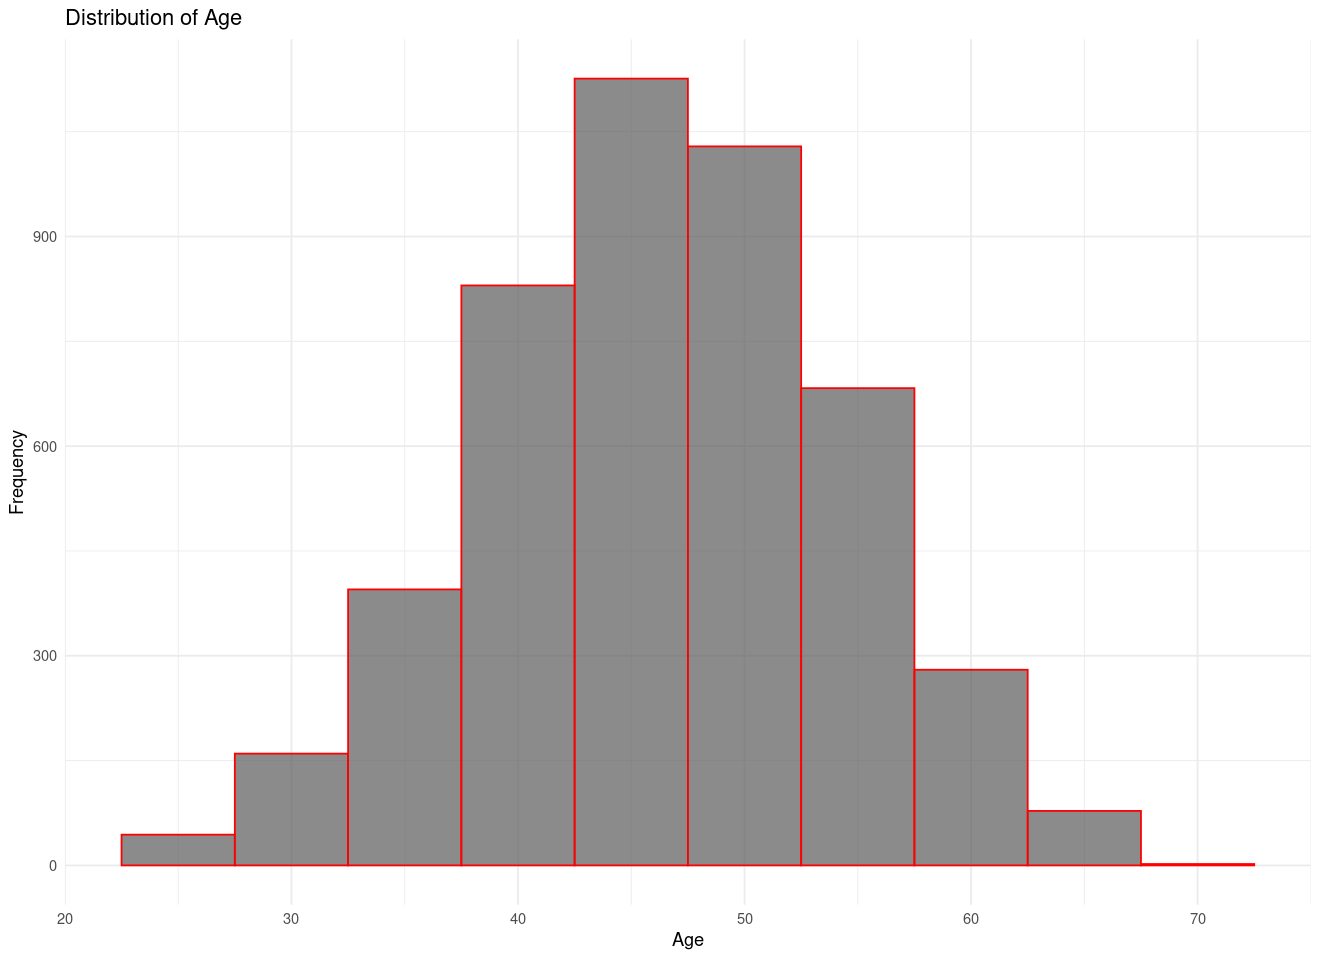

In [510]:

# Create a histogram of age by customer status
ggplot(credit_card_df, aes(x = age)) +
  geom_histogram(binwidth = 5, position = "dodge",  color = "red", alpha = 0.7) +
  labs(title = "Distribution of Age",
       x = "Age",
       y = "Frequency") +
  theme_minimal()


### Interpretation:
Based on the above graph, we can say that its normally distributed. But lets make a clear with more visual and statical analysis and then decide if its normally disributed. 2 ways we can check the normal distrbution are qqplots and Shapiro-Wilk test. 

### QQ plot:
A Q-Q (Quantile-Quantile) plot is a graphical tool used to assess whether a given sample follows a particular theoretical distribution, such as the normal distribution. The Q-Q plot compares the quantiles of the observed data to the quantiles of a specified probability distribution. If the points in the Q-Q plot lie approximately along a straight line, it suggests that the data is consistent with the chosen distribution.

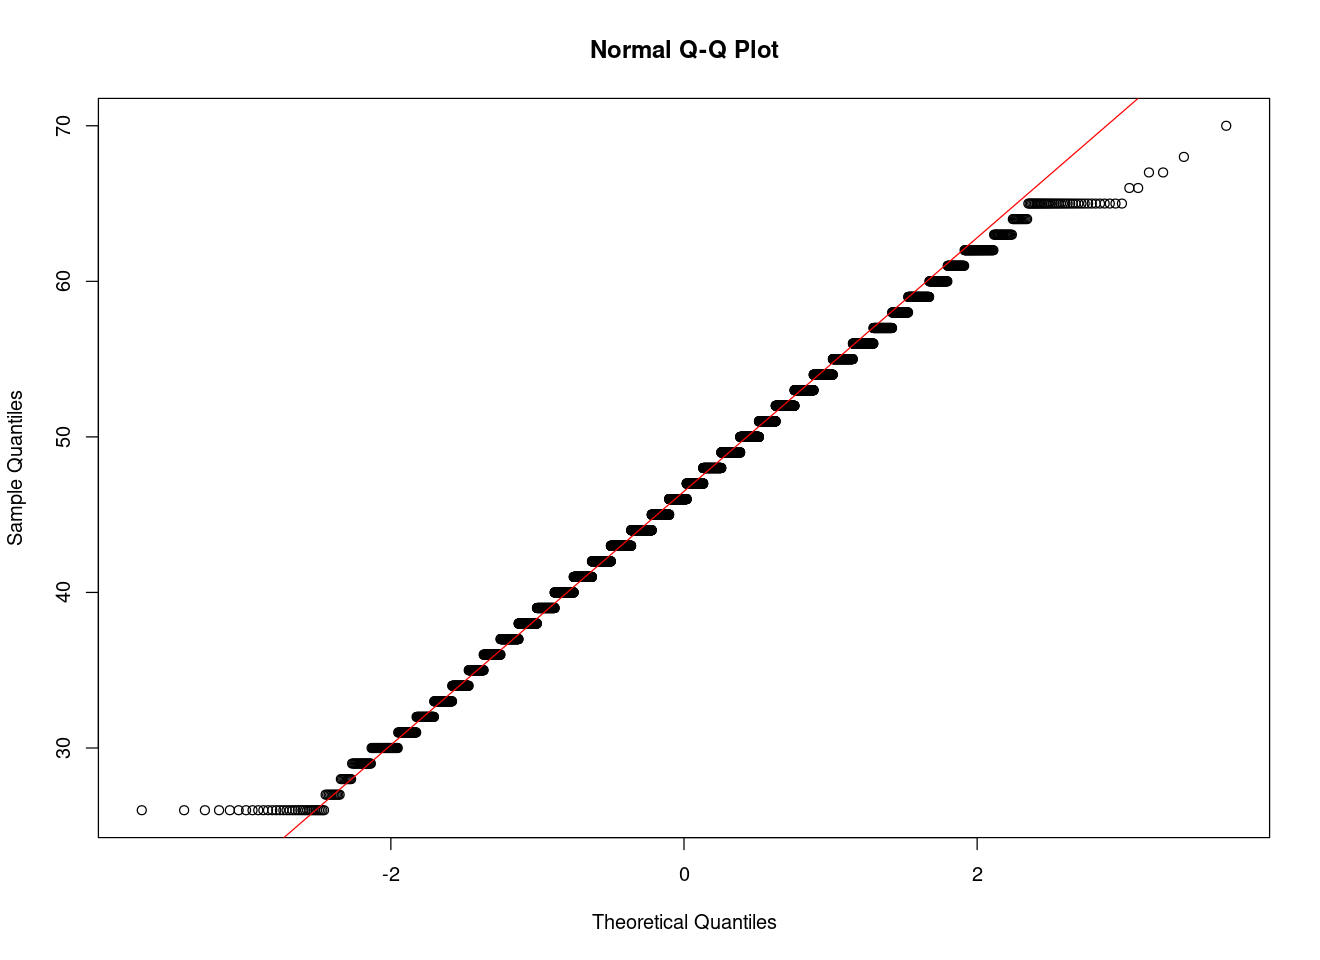

In [511]:
# Q-Q plot with a red line
qqnorm(credit_card_df$age)
qqline(credit_card_df$age, col = "red")


### Interpretation:
If the Q-Q plot looks very close to a straight line, especially if it follows the 45-degree reference line, it suggests that the data is approximately normally distributed. This is visually assessed by checking if the points on the plot align closely with the reference line. As we can see that both are almost alligned, we can decide that age is normally distributed. But just for further conformation rater than Visual Inspection (Q-Q Plot), lets do statistcal way - Shapiro-Wilk test.


### Shapiro-Wilk normality test
The Shapiro-Wilk normality test is used to assess whether a given sample comes from a normally distributed population. 

In [512]:
# Shapiro-Wilk test for normality
shapiro.test(credit_card_df$age)



	Shapiro-Wilk normality test

data:  credit_card_df$age
W = 0.99617, p-value = 1.402e-09


### Interpretation:

The Shapiro-Wilk test is commonly used to assess normality in a dataset. In your case:

W (Test Statistic): The test statistic (W = 0.99617) is close to 1. When W is close to 1, it indicates that the sample distribution is close to normal. However, in large samples, even minor departures from normality can lead to statistically significant results.

p-value: The p-value (1.402e-09) is extremely small, indicating strong evidence against the null hypothesis that the data follows a normal distribution.


Given the small dataset (4678 records), the Q-Q plot looking close to a straight line is a good visual indicator that the data is approximately normal. However, the Shapiro-Wilk test might be overly sensitive in detecting deviations from normality. 

In practice, considering both the Q-Q plot and the p-value is a reasonable approach. If the Q-Q plot shows a straight line and you have a very small p-value, you might cautiously lean towards the assumption of normality. while the statistical test suggests non-normality due to the small p-value, the visual examination of the Q-Q plot and the proximity of the test W-statistic to 1 may lead you to tentatively assume normality. It's essential to consider the context of our analysis and the specific requirements of the statistical assumptions. Lets assume the data is normally distributed and and consider T-test to check the relationship between age and customer_status



### T-Test
A t-test is a statistical test used to compare the means of two groups and determine if they are significantly different from each other. It's particularly useful when dealing with numerical data and categorical variables with two levels (e.g., treatment vs. control, male vs. female). The t-test assesses whether the difference in means between the groups is likely due to chance or if it is statistically significant. 

Before that lets obtain a summary table for the above graph to see the percentages of active and closed account for all the ages.

In [513]:
# Summary table
age_summary <- credit_card_df %>%
  group_by(age, customer_status) %>%
  summarise(count = n()) %>%
  spread(customer_status, count, fill = 0) %>%
  mutate(closed_account_percent = closed_account / (closed_account + active) * 100,
         active_percent = active / (closed_account + active) * 100) %>%
  arrange(age)

# Display the summary table
age_summary


`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.
New names:
• `` -> `...1`


age,closed_account,active,closed_account_percent,active_percent
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,8,25,24.24242,75.75758
27,4,7,36.36364,63.63636
28,1,9,10.00000,90.00000
29,7,15,31.81818,68.18182
30,20,22,47.61905,52.38095
31,19,20,48.71795,51.28205
32,23,24,48.93617,51.06383
33,27,32,45.76271,54.23729
34,25,40,38.46154,61.53846


### Interpretation:
The above summary table offers valuable insights into the diverse closures of accounts across different age groups. However, considering the multitude of age categories, let's enhance our analysis by segmenting them into distinct groups to derive more meaningful observations.

In [514]:
# Create age segments
credit_card_df <- mutate(credit_card_df, age_segment = cut(age, breaks = seq(20, 70, by = 5)))

# Summary table for age segments
age_segment_summary <- credit_card_df %>%
  group_by(age_segment, customer_status) %>%
  summarise(count = n()) %>%
  spread(customer_status, count, fill = 0) %>%
  mutate(closed_account_percent = closed_account / (closed_account + active) * 100,
         active_percent = active / (closed_account + active) * 100) %>%
  arrange(age_segment)

# Display the summary table for age segments
age_segment_summary


`summarise()` has grouped output by 'age_segment'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


age_segment,closed_account,active,closed_account_percent,active_percent
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
"(25,30]",40,78,33.89831,66.10169
"(30,35]",120,159,43.01075,56.98925
"(35,40]",286,362,44.13580,55.86420
"(40,45]",501,581,46.30314,53.69686
"(45,50]",508,583,46.56279,53.43721
"(50,55]",370,462,44.47115,55.52885
"(55,60]",193,217,47.07317,52.92683
"(60,65]",71,90,44.09938,55.90062
"(65,70]",3,3,50.00000,50.00000


### Interpretation:
Based on the table above, it is evident that as age increases, there is a noticeable decline in the active percentage. Although the difference is not substantial, it prompts us to investigate whether these variations hold statistical significance.

In [515]:
# Split the data into two groups based on 'card_type'
group_A <- credit_card_df$age[credit_card_df$customer_status == 'closed_account']
group_B <- credit_card_df$age[credit_card_df$customer_status == 'active']

# Perform two-sample t-test
t_test_result <- t.test(group_A, group_B)

# Display the t-test results
print(t_test_result)



	Welch Two Sample t-test

data:  group_A and group_B
t = 1.4929, df = 4524.1, p-value = 0.1355
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1079666  0.7973685
sample estimates:
mean of x mean of y 
 46.56166  46.21696 



### Interpretation:

The **p-value** is 0.1355. This is the probability of observing a t-value as extreme as the one calculated, assuming the null hypothesis that there is no difference between the means. Generally, If the p-value is less than a chosen significance level (e.g., 0.05), you reject the null hypothesis. A rejection of the null hypothesis indicates that there is a significant difference in taste ratings among at least two ovens. A higher p-value suggests that you do not have enough evidence to reject the null hypothesis.

The **t-value** is 1.4929, which is a positive value. Positive t-values indicate that the mean of the first group (group A: customers with closed accounts) is higher than the mean of the second group (group B: customers with active accounts). The t-value of 1.4929 is relatively small(close to zero), suggesting that the difference in means is not very large compared to the variability within each group.

The **95%** **confidence** **interval** for the difference between the means is given as (-0.1079666, 0.7973685). This interval provides a range of plausible values for the true difference in means. Since it includes zero, it further supports the idea that there may not be a significant difference.


**Conclusion:**
The Welch Two Sample t-test compares the means of two groups, 'closed_account' and 'active,' based on 'card_type.' The results indicate a t-value of 1.4929 with a p-value of 0.1355. With a 95% confidence interval of (-0.1079666, 0.7973685) containing 0, we don't have enough evidence to reject the null hypothesis. Therefore, there's no significant difference in means between the groups, suggesting that 'card_type' doesn't play a significant role in the age difference between 'closed_account' and 'active' customers.

## Question 2


**Question**:
Does martial status and no of dependants has any impact to Close Accounts? 

**Answer**:
No, based on the conducted Wilcoxon rank-sum test for the number of dependents and the previous analysis on marital status, there is insufficient evidence to conclude that marital status and the number of dependents have a significant impact on the closure of accounts. The p-values for both tests (number of dependents and marital status) are greater than the common significance level of 0.05, suggesting no discernible association between these variables and account closure.


## Supporting Analysis


In [516]:
# Calculate the counts and percentages of closed and active accounts for each marital status
marital_status_summary <- credit_card_df %>%
  group_by(marital_status, customer_status) %>%
  summarize(count = n()) %>%
  group_by(marital_status) %>%
  mutate(percentage = count / sum(count) * 100)

# Filter for only active and closed accounts
marital_status_summary <- filter(marital_status_summary, customer_status %in% c("closed_account", "active"))

# Create a dodged (side-by-side) bar plot with ggplot2 using percentages
gg <- ggplot(marital_status_summary, aes(x = marital_status, y = percentage, fill = customer_status)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Impact of Marital Status on Closed Accounts",
       x = "Marital Status",
       y = "Percentage") +
  scale_fill_manual(values = c("closed_account" = "blue", "active" = "seagreen")) +
  theme_minimal()

# Convert ggplot to an interactive plot using plotly
ggplotly(gg)


# Calculate the counts and percentages of closed and active accounts for each number of dependents
dependents_summary <- credit_card_df %>%
  group_by(dependents, customer_status) %>%
  summarize(count = n()) %>%
  group_by(dependents) %>%
  mutate(percentage = count / sum(count) * 100)

# Create a dodged (side-by-side) bar plot with ggplot2 using percentages
gg <- ggplot(dependents_summary, aes(x = as.factor(dependents), y = percentage, fill = customer_status)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Distribution of Number of Dependents for Closed and Active Accounts",
       x = "Number of Dependents",
       y = "Percentage") +
  scale_fill_manual(values = c("closed_account" = "red", "active" = "pink")) +
  theme_minimal()

# Convert ggplot to an interactive plot using plotly
ggplotly(gg)


`summarise()` has grouped output by 'marital_status'. You can override using
the `.groups` argument.


HTML widgets cannot be represented in plain text (need html)

`summarise()` has grouped output by 'dependents'. You can override using the
`.groups` argument.


HTML widgets cannot be represented in plain text (need html)

### Interpretation:
The above are the plot of perecentages of count vs marital status and perecentages of no of dependencies. We have not directly taken count because cosidering percebtage can be a more accurate visualisation as tehre me be diffrences in the count of samples.

In [517]:


# Calculate the counts and percentages of closed and active accounts for each marital_status
marital_status_summary <- credit_card_df %>%
  group_by(marital_status, customer_status) %>%
  summarize(count = n()) %>%
  group_by(marital_status) %>%
  summarize(total = sum(count),
            closed_account_count = sum(ifelse(customer_status == "closed_account", count, 0)),
            active_count = sum(ifelse(customer_status == "active", count, 0)),
            closed_account_percentage = closed_account_count / total * 100,
            active_percentage = active_count / total * 100)

# Display the summary table for education
marital_status_summary
cat("\n")





# Calculate the counts and percentages of closed and active accounts for each number of dependents
dependents_summary <- credit_card_df %>%
  group_by(dependents, customer_status) %>%
  summarize(count = n()) %>%
  group_by(dependents) %>%
  summarize(total = sum(count),
            closed_account_count = sum(ifelse(customer_status == "closed_account", count, 0)),
            active_count = sum(ifelse(customer_status == "active", count, 0)),
            closed_account_percentage = closed_account_count / total * 100,
            active_percentage = active_count / total * 100)

# Display the summary table for education
dependents_summary
cat("\n")






`summarise()` has grouped output by 'marital_status'. You can override using
the `.groups` argument.


marital_status,total,closed_account_count,active_count,closed_account_percentage,active_percentage
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
single,2007,944,1063,47.03538,52.96462
married,2266,989,1277,43.64519,56.35481
divorced,354,159,195,44.91525,55.08475


`summarise()` has grouped output by 'dependents'. You can override using the
`.groups` argument.


dependents,total,closed_account_count,active_count,closed_account_percentage,active_percentage
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,411,178,233,43.30900,56.69100
1,820,345,475,42.07317,57.92683
2,1133,521,612,45.98411,54.01589
3,1323,630,693,47.61905,52.38095
4,749,336,413,44.85981,55.14019
5,191,82,109,42.93194,57.06806


### Interpretation:
Based on summary tables and distributions, we can say that there is no significant impact of the marital status and number of depandants. But to further analyse this accurately lets perform some statistical tests. 

chi-square test for independence would be an appropriate statistical test to check the relationship between customer status and marital status. This test is used when you want to examine whether there is a significant association between two categorical variables.


In [518]:

# Chi-squared test for Marital status
contingency_table <- table(credit_card_df$marital_status, credit_card_df$customer_status)
chi_squared_result <- chisq.test(contingency_table)

print(chi_squared_result)



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 4.952, df = 2, p-value = 0.08408



### Interpretation

Based on the results, it can be concluded that there is insufficient evidence to reject the null hypothesis. The association between marital status and the closure of credit card accounts does not reach statistical significance at the 0.05 significance level, suggesting no discernible impact of marital status on account closure. However, it is crucial to emphasize that the interpretation may vary based on the selected significance level and the study's context.

Exploration of additional factors influencing the relationship between marital status and account closure is warranted. For instance, in the case of married individuals, an increase in the number of dependents may occur, potentially influencing the likelihood of account closure.

Further analysis, specifically investigating the probability of account closure in relation to various predictor variables, will be conducted later using correlation plots and diverse machine learning models. For now, the focus will remain on understanding the individual impact of marital status on account closure.

For assessing the impact of the number of dependents (numerical variable) on the closure of accounts (two-group categorical variable), you can consider the same approach as previous question. So at first check the normal distribution of Number of Dependents to decide the test.



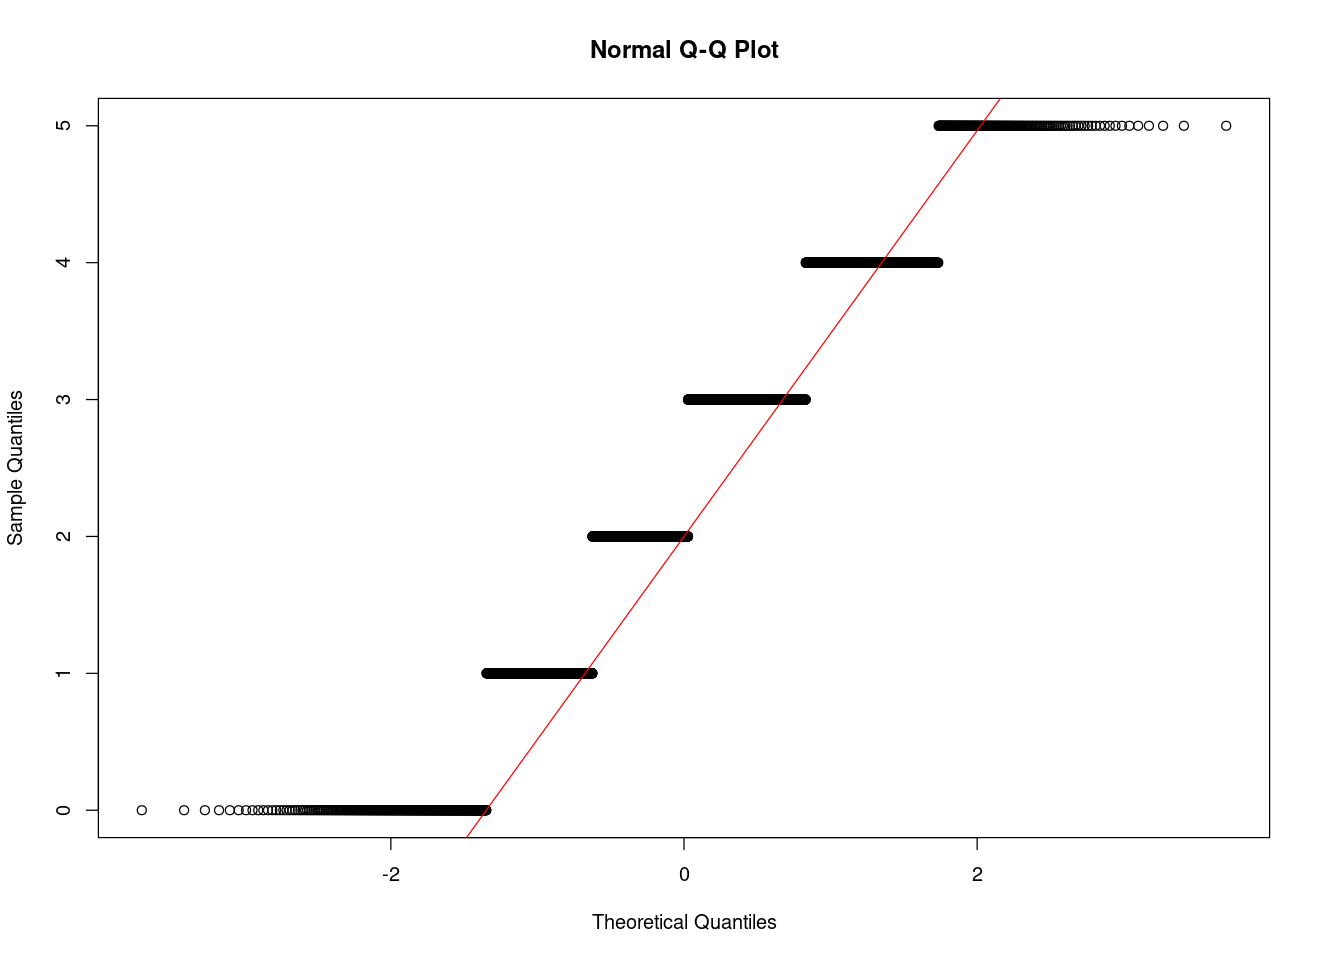

In [519]:
# Q-Q plot with a red line
qqnorm(credit_card_df$dependents)
qqline(credit_card_df$dependents, col = "red")


The qq plot shows that there are few points that are deviated from the line so this might not be normally distributed. Lets check Shapiro-Wilk test results.

In [520]:
# Shapiro-Wilk test for normality
shapiro.test(credit_card_df$dependents)


	Shapiro-Wilk normality test

data:  credit_card_df$dependents
W = 0.93532, p-value < 2.2e-16


### Interpretation:

W statistic: 0.93532
p-value: < 2.2e-16

W statistic: The W statistic is a test statistic generated by the Shapiro-Wilk test. It ranges between 0 and 1. In this case, W is 0.93532.
p-value: The p-value is a measure of evidence against a null hypothesis. In this case, the p-value is very close to zero (p-value < 2.2e-16).

**Conclusion:**

The p-value is less than the significance level of 0.05 (commonly used). Therefore, we reject the null hypothesis.
Null Hypothesis (H0): The data follows a normal distribution.
Alternative Hypothesis (H1): The data does not follow a normal distribution.

**Overall Interpretation:**
There is strong evidence to suggest that the variable "dependents" does not follow a normal distribution. The departure from normality is statistically significant based on the extremely low p-value. This might indicate that the data is skewed or has a non-normal distribution.

### The Mann-Whitney U Test
The Mann-Whitney U Test, also known as the Wilcoxon rank-sum test, is a non-parametric test used to assess whether there is a significant difference between the distributions of two independent groups. It does not assume normality in the data. In this case, you want to perform the Mann-Whitney U Test on the income variable to check if there's a significant difference between the dependants distributions of closed and active accounts.

In [521]:
# Mann-Whitney U Test
wilcox.test(dependents ~ customer_status, data = credit_card_df)



	Wilcoxon rank sum test with continuity correction

data:  dependents by customer_status
W = 2710402, p-value = 0.1826
alternative hypothesis: true location shift is not equal to 0


### Interpretation:

Test Statistic (W): The test statistic, W, is a measure of the sum of ranks assigned to the observations in the two groups. In this case, the calculated W value is 2710402.

p-value: The p-value associated with the test is 0.1826. This p-value represents the probability of observing a test statistic as extreme as, or more extreme than, the one calculated under the null hypothesis (assuming no difference in the distribution of dependents between closed and active accounts).

**Alternative Hypothesis:** The alternative hypothesis states that the true location shift (difference in medians) is not equal to 0.

The p-value of 0.1826 is greater than the common significance level of 0.05. Therefore, based on this test, there is not enough evidence to reject the null hypothesis. The results suggest that there is no significant difference in the distribution of the number of dependents between closed and active accounts.

In summary, the Wilcoxon rank-sum test with continuity correction does not provide sufficient evidence to conclude that the number of dependents has a significant impact on the closure of accounts.

## Question 3


**Question 3**:
Does increased card usage impact the likelihood of account closure among customers?


**Answer**:
Yes, increased card usage, as measured by both utilization ratio and the number of transactions per year, significantly impacts the likelihood of account closure among customers. Customers with lower utilization ratios and fewer transactions per year are more likely to close their accounts. Additionally, a higher number of inactive months last year is associated with increased account closures, indicating that customers with more prolonged periods of inactivity are more likely to close their accounts.

## Supporting Analysis


To analyse this, lets cosider utilization ratio, inactive months and no of transactions per year. The utilization ratio is the ratio of the montly used amount or spent amount to credit limit. Lets check the distribution of these variables for closed and active accounts first and then do further analysis.

In [522]:

# Distribution of Months Inactive Last Year (Interactive)
inactive_months_plot <- ggplot(credit_card_df, aes(x = months_inactive_last_year, fill = customer_status)) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Months Inactive Last Year for Closed and Active Accounts",
       x = "Months Inactive Last Year",
       y = "Density") 

inactive_months_plot_interactive <- ggplotly(inactive_months_plot)

# Display interactive plot
inactive_months_plot_interactive




# Distribution of Utilization Ratio 
utilization_plot <- ggplot(credit_card_df, aes(x = utilization_ratio, fill = customer_status)) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Utilization Ratio for Closed and Active Accounts",
       x = "Utilization Ratio",
       y = "Density")

utilization_plot_interactive <- ggplotly(utilization_plot)

# Distribution of Transactions per Year 
transactions_plot <- ggplot(credit_card_df, aes(x = transactions_last_year, fill = customer_status)) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Transactions per Year for Closed and Active Accounts",
       x = "Transactions Last Year",
       y = "Density") 

transactions_plot_interactive <- ggplotly(transactions_plot)

# Display interactive plots
utilization_plot_interactive
transactions_plot_interactive


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

### Interpretation:
Based on the distributions, we can observe that the people who inactive for more than 2 months, who rarely uses the card(less than 1 percent of utilization ratio (<0.01)) and making rougly 30-50 transactions a year, are more likely to close the account than people with more transactions. 

Now lets perform T-test to more accurately check the dependency and variance of customer_status on these 3 variables

In [523]:

# Perform t-test for Months Inactive Last Year
t_test_inactive_months <- t.test(credit_card_df$months_inactive_last_year[credit_card_df$customer_status == 'closed_account'],
                                 credit_card_df$months_inactive_last_year[credit_card_df$customer_status == 'active'],
                                 alternative = "two.sided", var.equal = FALSE)

# Display t-test results
print(t_test_inactive_months)



	Welch Two Sample t-test

data:  credit_card_df$months_inactive_last_year[credit_card_df$customer_status == "closed_account"] and credit_card_df$months_inactive_last_year[credit_card_df$customer_status == "active"]
t = 15.262, df = 4593.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3744721 0.4848601
sample estimates:
mean of x mean of y 
 2.691205  2.261538 



### Interpretation:
The p-value being extremely small (< 2.2e-16) provides strong evidence to reject the null hypothesis. This suggests a statistically significant difference in the means of months inactive last year between closed and active accounts. The positive t-value and the 95% confidence interval (0.3744721, 0.4848601) indicate that, on average, closed accounts have a higher number of months inactive last year compared to active accounts. The difference is statistically significant and suggests that customers with a higher number of months of inactivity are more likely to close their accounts.

In [524]:
# Perform t-test for Utilization Ratio
t_test_utilization <- t.test(credit_card_df$utilization_ratio[credit_card_df$customer_status == 'closed_account'],
                             credit_card_df$utilization_ratio[credit_card_df$customer_status == 'active'],
                             alternative = "two.sided", var.equal = FALSE)

# Display t-test results
print(t_test_utilization)



	Welch Two Sample t-test

data:  credit_card_df$utilization_ratio[credit_card_df$customer_status == "closed_account"] and credit_card_df$utilization_ratio[credit_card_df$customer_status == "active"]
t = -16.331, df = 4485.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1438642 -0.1130256
sample estimates:
mean of x mean of y 
0.1610186 0.2894635 




### Interpretation:
The p-value of less than 2.2e-16 is highly significant, suggesting strong evidence to reject the null hypothesis. This indicates a statistically significant difference in the means of the utilization ratio between closed and active accounts. The negative t-value suggests that, on average, closed accounts have a lower utilization ratio than active accounts. The 95% confidence interval further supports this conclusion, as it does not contain zero.

In [525]:
# Perform t-test for Transactions per Year
t_test_transactions <- t.test(credit_card_df$transactions_last_year[credit_card_df$customer_status == 'closed_account'],
                              credit_card_df$transactions_last_year[credit_card_df$customer_status == 'active'],
                              alternative = "two.sided", var.equal = FALSE)

# Display t-test results
print(t_test_transactions)



	Welch Two Sample t-test

data:  credit_card_df$transactions_last_year[credit_card_df$customer_status == "closed_account"] and credit_card_df$transactions_last_year[credit_card_df$customer_status == "active"]
t = -42.31, df = 4371.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -24.50338 -22.33312
sample estimates:
mean of x mean of y 
 45.03776  68.45602 



### Interpretation:
The p-value being less than 2.2e-16 is highly significant, providing strong evidence to reject the null hypothesis. This indicates a statistically significant difference in the means of the number of transactions per year between closed and active accounts. The negative t-value suggests that, on average, closed accounts have fewer transactions than active accounts. The 95% confidence interval, not containing zero, supports this conclusion.

### Overall Conclusion:
The distributions and the thress Welch Two Sample t-tests show strong evidence that there are significant differences in Inactive months,utilization ratio and the number of transactions per year between closed and active accounts. Customers who uses the card less are more likely closing 

## Question 4


**Question**:
How does the socioeconomic profile, comprising education level, employment status, and income, correlate with the likelihood of credit card account closure among customers?


**Answer**:
The education level and income is not impacting much but the partime employee workers, tend to clos account more than others.

In [526]:
# Calculate counts and percentages of closed and active accounts for each education level
education_summary <- credit_card_df %>%
  group_by(education, customer_status) %>%
  summarize(count = n()) %>%
  group_by(education) %>%
  mutate(percentage = count / sum(count) * 100)

# Filter for only active and closed accounts
education_summary <- filter(education_summary, customer_status %in% c("closed_account", "active"))

# Create a dodged bar plot with ggplot2 using percentages
gg_education <- ggplot(education_summary, aes(x = education, y = percentage, fill = customer_status)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Impact of Education Level on Closed Accounts",
       x = "Education Level",
       y = "Percentage") +
  scale_fill_manual(values = c("closed_account" = "orange", "active" = "lightblue")) +
  theme_minimal()

# Convert ggplot to an interactive plot using plotly
ggplotly(gg_education)


# Calculate counts and percentages of closed and active accounts for each employment status
employment_summary <- credit_card_df %>%
  group_by(employment_status, customer_status) %>%
  summarize(count = n()) %>%
  group_by(employment_status) %>%
  mutate(percentage = count / sum(count) * 100)

# Filter for only active and closed accounts
employment_summary <- filter(employment_summary, customer_status %in% c("closed_account", "active"))

# Create a dodged bar plot with ggplot2 using percentages
gg_employment <- ggplot(employment_summary, aes(x = employment_status, y = percentage, fill = customer_status)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Impact of Employment Status on Closed Accounts",
       x = "Employment Status",
       y = "Percentage") +
  scale_fill_manual(values = c("closed_account" = "orange", "active" = "lightblue")) +
  theme_minimal()

# Convert ggplot to an interactive plot using plotly
ggplotly(gg_employment)



# Histogram for Income
income_histogram <- ggplot(credit_card_df, aes(x = income, fill = customer_status)) +
  geom_histogram(binwidth = 5000, position = "dodge", alpha = 0.7) +
  labs(title = "Distribution of Income for Closed and Active Accounts",
       x = "Income",
       y = "Count") +
  scale_fill_manual(values = c("closed_account" = "orange", "active" = "lightblue")) +
  theme_minimal()

# Convert ggplot to an interactive plot using plotly
income_histogram_interactive <- ggplotly(income_histogram)
income_histogram_interactive






`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


HTML widgets cannot be represented in plain text (need html)

`summarise()` has grouped output by 'employment_status'. You can override using
the `.groups` argument.


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

### Interpretation:
From the distributions, we can observe that there is no much impact of education level and income but there is some significant difference of employement status. To check this lets do some summary tables and statisticals tests.

In [527]:
# Calculate the counts and percentages of closed and active accounts for each education level
education_summary <- credit_card_df %>%
  group_by(education, customer_status) %>%
  summarize(count = n()) %>%
  group_by(education) %>%
  summarize(total = sum(count),
            closed_account_count = sum(ifelse(customer_status == "closed_account", count, 0)),
            active_count = sum(ifelse(customer_status == "active", count, 0)),
            closed_account_percentage = closed_account_count / total * 100,
            active_percentage = active_count / total * 100)

# Display the summary table for education
education_summary
cat("\n")

# Calculate the counts and percentages of closed and active accounts for each employment status
employment_summary <- credit_card_df %>%
  group_by(employment_status, customer_status) %>%
  summarize(count = n()) %>%
  group_by(employment_status) %>%
  summarize(total = sum(count),
            closed_account_count = sum(ifelse(customer_status == "closed_account", count, 0)),
            active_count = sum(ifelse(customer_status == "active", count, 0)),
            closed_account_percentage = closed_account_count / total * 100,
            active_percentage = active_count / total * 100)

# Display the summary table for employment status
employment_summary
cat("\n")

# Create income segments
credit_card_df <- mutate(credit_card_df, income_segment = cut(income, breaks = c(-Inf, 50000, 100000, Inf)))

# Define income segments
income_segments <- c("<50k", "50k-75k", "75k-100k", "100k-125k", "125k-150k", "150k+")

# Create income segments
credit_card_df <- mutate(credit_card_df, income_segment = cut(income, breaks = c(-Inf, 50000, 75000, 100000, 125000, 150000, Inf)))

# Create income segments
income_breaks <- c(0, 50000, 75000, 100000, 125000, 150000, Inf)
credit_card_df <- mutate(credit_card_df, income_segment = cut(income, breaks = income_breaks, labels = c("<50k", "50k-75k", "75k-100k", "100k-125k", "125k-150k", ">150k"), include.lowest = TRUE, right = FALSE))

# Summary table for income segments
income_segment_summary <- credit_card_df %>%
  group_by(income_segment, customer_status) %>%
  summarise(count = n()) %>%
  spread(customer_status, count, fill = 0) %>%
  mutate(closed_account_percent = closed_account / (closed_account + active) * 100,
         active_percent = active / (closed_account + active) * 100) %>%
  arrange(income_segment)

# Display the summary table for income segments
income_segment_summary


`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


education,total,closed_account_count,active_count,closed_account_percentage,active_percentage
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
associates,1927,874,1053,45.35547,54.64453
bachelors,469,201,268,42.85714,57.14286
masters,1995,891,1104,44.66165,55.33835
doctorate,236,126,110,53.38983,46.61017


`summarise()` has grouped output by 'employment_status'. You can override using
the `.groups` argument.


employment_status,total,closed_account_count,active_count,closed_account_percentage,active_percentage
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
full_time,2390,865,1525,36.19247,63.80753
part_time,1527,1014,513,66.40472,33.59528
self_employed,710,213,497,30.00000,70.00000


`summarise()` has grouped output by 'income_segment'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


income_segment,closed_account,active,closed_account_percent,active_percent
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
<50k,1116,1249,47.18816,52.81184
50k-75k,424,597,41.52791,58.47209
75k-100k,223,277,44.60000,55.40000
100k-125k,178,234,43.20388,56.79612
125k-150k,102,122,45.53571,54.46429
>150k,49,56,46.66667,53.33333


### Interpretations 

The provided summary tables offer insights into the relationship between the socioeconomic profile and the likelihood of credit card account closure:

1. **Education Level:**
Customers with different education levels show varying patterns. For instance, those with a doctorate have a higher closed account percentage (53.39%), suggesting a potential correlation between advanced education and account closure.

2. **Employment Status:**
Full-time employees exhibit a lower closed account percentage (36.19%) compared to part-time and self-employed individuals. The highest closed account percentage is observed among part-time employees (66.40%), indicating a potential correlation between employment status and account closure.

3. **Income Segments:**
The income segments display distinct patterns. Customers with income between 50k-75k have a closed account percentage of 41.53%, while those with income above 150k exhibit a closed account percentage of 46.67%. This suggests a potential correlation between income levels and the likelihood of credit card account closure.

In summary, these findings suggest that factors such as education level, employment status, and income may contribute to variations in the likelihood of credit card account closure among customers. However, further statistical analysis and visualization may be necessary to validate and explore these correlations more comprehensively.

For further analysis as we have done for before questions, we can perform chi square for education level and employment_status. For Income, based on normal distribution we can decide which one to select.

In [528]:
# Chi-squared test for education level
education_contingency <- table(credit_card_df$education, credit_card_df$customer_status)
chi_squared_education <- chisq.test(education_contingency)
print(chi_squared_education)

# Chi-squared test for employment status
employment_contingency <- table(credit_card_df$employment_status, credit_card_df$customer_status)
chi_squared_employment <- chisq.test(employment_contingency)
print(chi_squared_employment)



	Pearson's Chi-squared test

data:  education_contingency
X-squared = 7.6815, df = 3, p-value = 0.05307


	Pearson's Chi-squared test

data:  employment_contingency
X-squared = 421.69, df = 2, p-value < 2.2e-16



### Interpretation: 

**Education Level:**
The p-value of 0.05307 is greater than the conventional significance level of 0.05. Therefore, based on the results, there is insufficient evidence to reject the null hypothesis. The association between education level and the closure of credit card accounts does not reach statistical significance at the 0.05 significance level.

**Employment Status:**
The p-value is extremely small (p-value < 2.2e-16), indicating strong evidence to reject the null hypothesis. There is a significant association between employment status and the closure of credit card accounts. The large chi-squared value suggests a substantial difference between the expected and observed frequencies, supporting the conclusion that employment status impacts the likelihood of account closure.

In summary, for education level, there is no significant association, while for employment status, there is a significant association with the closure of credit card accounts.

In [529]:
# Shapiro-Wilk test for normality of income
shapiro_income <- shapiro.test(credit_card_df$income)
print(shapiro_income)



	Shapiro-Wilk normality test

data:  credit_card_df$income
W = 0.82749, p-value < 2.2e-16



### Interpretation:

As we know the null hypothesis for the Shapiro-Wilk test is that the data follows a normal distribution. If the p-value is less than the significance level (commonly 0.05), we reject the null hypothesis, indicating that the data is not normally distributed.

The Shapiro-Wilk test for normality yielded a very low p-value (p < 0.05), leading to the rejection of the null hypothesis. Therefore, we have sufficient evidence to conclude that the income variable is not normally distributed in the dataset. Lets perform Mann-Whitney U Test on income

In [530]:
# Perform Mann-Whitney U Test on income
mann_whitney_result <- wilcox.test(income ~ customer_status, data = credit_card_df)

# Display the results
print(mann_whitney_result)



	Wilcoxon rank sum test with continuity correction

data:  income by customer_status
W = 2567926, p-value = 0.06426
alternative hypothesis: true location shift is not equal to 0



### Interpretation:

The p-value of 0.06426 is greater than the conventional significance level of 0.05. Therefore, based on the results, there is insufficient evidence to reject the null hypothesis. The null hypothesis for the Wilcoxon rank sum test is that there is no difference in the distribution of income between closed and active accounts.

The alternative hypothesis suggests that there may be a shift in the location (median) of income between the two groups, but the evidence is not strong enough to conclude this based on the p-value. The true location shift (difference in medians) is not deemed significant at the 0.05 significance level.

In summary, according to the Wilcoxon rank sum test, there is no statistically significant difference in income distribution between closed and active credit card accounts.

## Question 5


**Question**:
"Do customers with a longer tenure, higher number of accounts, and specific credit card types exhibit a tendency to close their credit card accounts?"


**Answer**:
No significant tendency is observed for customers with a longer tenure. However, there is a tendency for customers with a higher number of accounts and specific credit card types to exhibit lower closed account percentages.


## Supporting Analysis


In [531]:
# Define custom colors
closed_color <- "#B22222"  # Brick Red
active_color <- "#808080"  # Gray

# Convert factors to characters
credit_card_df <- credit_card_df %>%
  mutate_if(is.factor, as.character)

# Convert 'months_since_first_account' to numeric
credit_card_df$months_since_first_account <- as.numeric(credit_card_df$months_since_first_account)

# Filter for only closed and active accounts
filtered_df <- credit_card_df %>%
  filter(customer_status %in% c("closed_account", "active"))

# Create an interactive line chart for active months count since start
line_chart_tenure <- ggplot(filtered_df, aes(x = months_since_first_account, group = customer_status, color = customer_status)) +
  geom_line(stat = "density") +
  labs(title = "Relationship between Active Months Count and Account Closure",
       x = "Active Months Count since Start",
       y = "Density",
       color = "Customer Status") +
  scale_color_manual(values = c(closed_account = closed_color, active = active_color)) +
  theme_minimal()

# Create an interactive line chart for total accounts
line_chart_accounts <- ggplot(filtered_df, aes(x = total_accounts, group = customer_status, color = customer_status)) +
  geom_line(stat = "density") +
  labs(title = "Relationship between Total Accounts and Account Closure",
       x = "Total Accounts",
       y = "Density",
       color = "Customer Status") +
  scale_color_manual(values = c(closed_account = closed_color, active = active_color)) +
  theme_minimal()

# Calculate percentages for the bar chart
bar_chart_data <- filtered_df %>%
  group_by(card_type, customer_status) %>%
  summarise(count = n()) %>%
  group_by(card_type) %>%
  mutate(percentage = count / sum(count) * 100)

# Create an interactive bar chart for specific credit card types
bar_chart_card_type <- ggplot(bar_chart_data, aes(x = card_type, y = percentage, fill = customer_status)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Distribution of Credit Card Types for Closed and Active Accounts",
       x = "Credit Card Type",
       y = "Percentage",
       fill = "Customer Status") +
  scale_fill_manual(values = c(closed_account = closed_color, active = active_color)) +
  theme_minimal()


# Convert ggplots to interactive plots using plotly
interactive_chart_tenure <- ggplotly(line_chart_tenure)
interactive_chart_accounts <- ggplotly(line_chart_accounts)
interactive_chart_card_type <- ggplotly(bar_chart_card_type)

# Display the interactive charts
interactive_chart_tenure
interactive_chart_accounts
interactive_chart_card_type


`summarise()` has grouped output by 'card_type'. You can override using the
`.groups` argument.


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

### Interpretation
Based of the plots, we can say that there is no much significant effect of active months on closer status but there is a difference in lines of closed and active for total account and also differnce for different card types. Lets do further analysis to check this.

In [532]:
# Create summary table for active months
active_months_summary <- filtered_df %>%
  group_by(months_since_first_account, customer_status) %>%
  summarize(count = n()) %>%
  spread(customer_status, count, fill = 0) %>%
  mutate(closed_account_percent = closed_account / (closed_account + active) * 100,
         active_percent = active / (closed_account + active) * 100) %>%
  arrange(months_since_first_account)

# Display the summary table for active months
active_months_summary
cat("\n")

# Create summary table for total accounts
total_accounts_summary <- filtered_df %>%
  group_by(total_accounts, customer_status) %>%
  summarize(count = n()) %>%
  spread(customer_status, count, fill = 0) %>%
  mutate(closed_account_percent = closed_account / (closed_account + active) * 100,
         active_percent = active / (closed_account + active) * 100) %>%
  arrange(total_accounts)

# Display the summary table for total accounts
total_accounts_summary
cat("\n")

# Calculate percentages for the bar chart
bar_chart_data <- filtered_df %>%
  group_by(card_type, customer_status) %>%
  summarise(count = n()) %>%
  group_by(card_type) %>%
  mutate(percentage = count / sum(count) * 100)

# Create summary table for specific credit card types
card_type_summary <- bar_chart_data %>%
  spread(customer_status, count, fill = 0) %>%
  mutate(closed_account_percent = closed_account / (closed_account + active) * 100,
         active_percent = active / (closed_account + active) * 100) %>%
  arrange(card_type)

# Display the summary table for specific credit card types
card_type_summary


`summarise()` has grouped output by 'months_since_first_account'. You can
override using the `.groups` argument.
New names:
• `` -> `...1`


months_since_first_account,active,closed_account,closed_account_percent,active_percent
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,21,10,32.25806,67.74194
14,6,2,25.00000,75.00000
15,6,10,62.50000,37.50000
16,7,4,36.36364,63.63636
17,15,5,25.00000,75.00000
18,18,15,45.45455,54.54545
19,10,8,44.44444,55.55556
20,17,16,48.48485,51.51515
21,20,13,39.39394,60.60606


`summarise()` has grouped output by 'total_accounts'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


total_accounts,active,closed_account,closed_account_percent,active_percent
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,195,296,60.28513,39.71487
2,255,447,63.67521,36.32479
3,575,513,47.15074,52.84926
4,496,282,36.24679,63.75321
5,520,295,36.19632,63.80368
6,494,259,34.39575,65.60425


`summarise()` has grouped output by 'card_type'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


card_type,percentage,active,closed_account,closed_account_percent,active_percent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
blue,41.31713,1054,0,0,100
blue,58.68287,0,1497,100,0
gold,32.92952,0,299,100,0
gold,67.07048,609,0,0,100
silver,25.34247,0,296,100,0
silver,74.65753,872,0,0,100


### Interpretation

Customers with a longer tenure (measured by active months since the start) tend to exhibit no much difference. On the other hand, customers with a higher number of total accounts and those with specific credit card types show a tendency towards lower closed account percentages. For example, as the number of total accounts increases, the closed account percentage decreases, and different credit card types exhibit varying closed account percentages, with "gold" having the highest at 67.07%. Lets do some statistical tetsing and analyse more correctly.

Lets perform chi-square test for card type and customer status

In [533]:
# Create a contingency table
customer_status_contingency <- table( credit_card_df$customer_status,credit_card_df$card_type)

# Perform the chi-square test
chi_square_result <- chisq.test(customer_status_contingency)

# Display the chi-square test result
chi_square_result



	Pearson's Chi-squared test

data:  customer_status_contingency
X-squared = 428.33, df = 2, p-value < 2.2e-16


### Interpretation:
The chi-square statistic of 428.33 with 2 degrees of freedom indicates a significant association between the "card_type" and "customer_status" variables. The extremely small p-value (< 2.2e-16) suggests strong evidence against the null hypothesis of independence. Therefore, we reject the null hypothesis and conclude that there is a significant relationship between the type of credit card ("card_type") and the customer status ("customer_status").

In practical terms, this implies that the distribution of closed and active accounts varies significantly across different credit card types. The p-value being extremely close to zero indicates high confidence in the observed association.


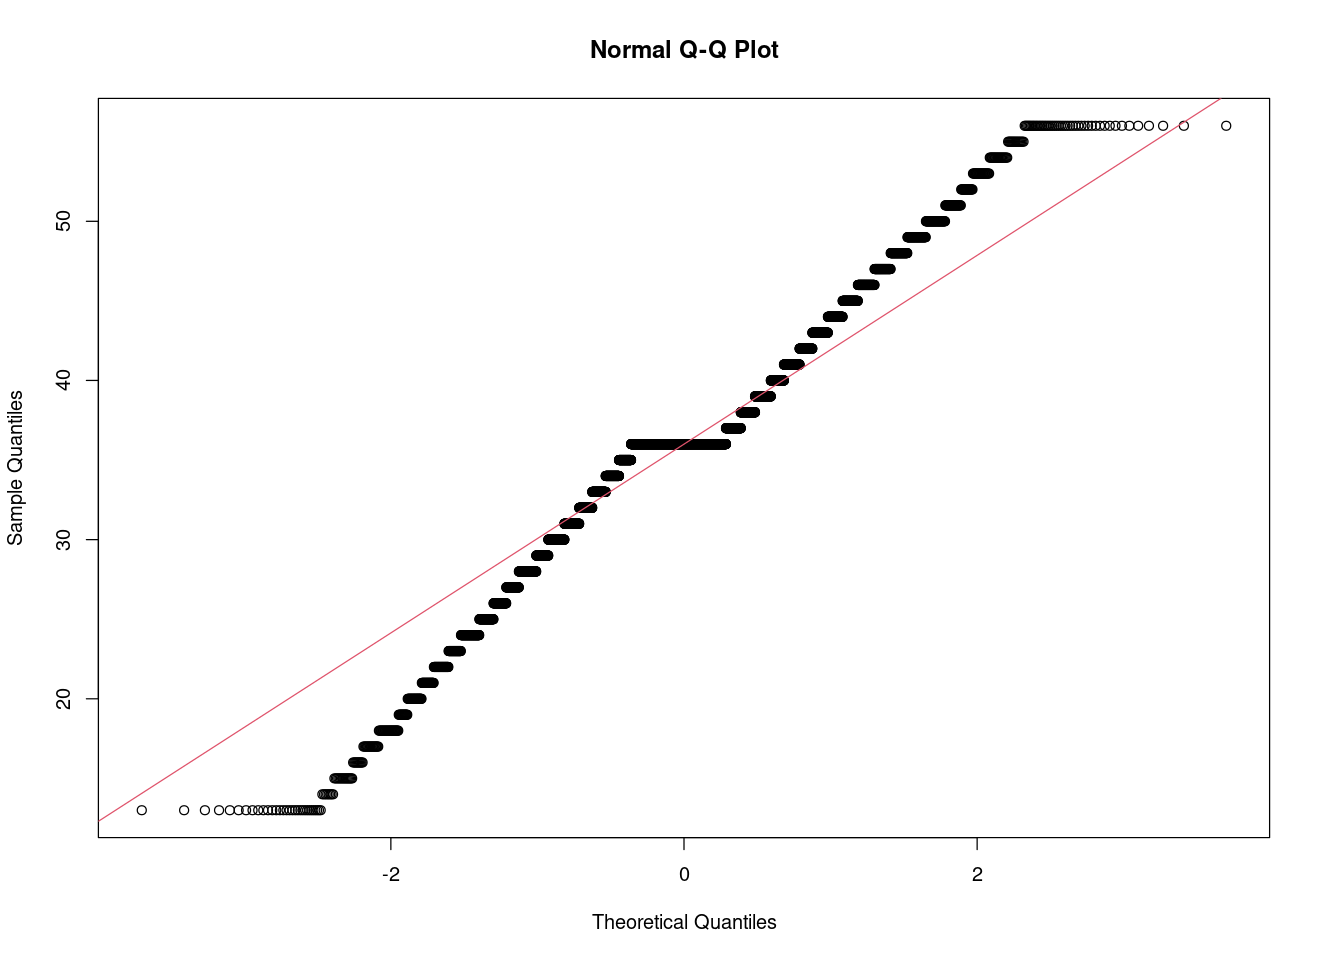

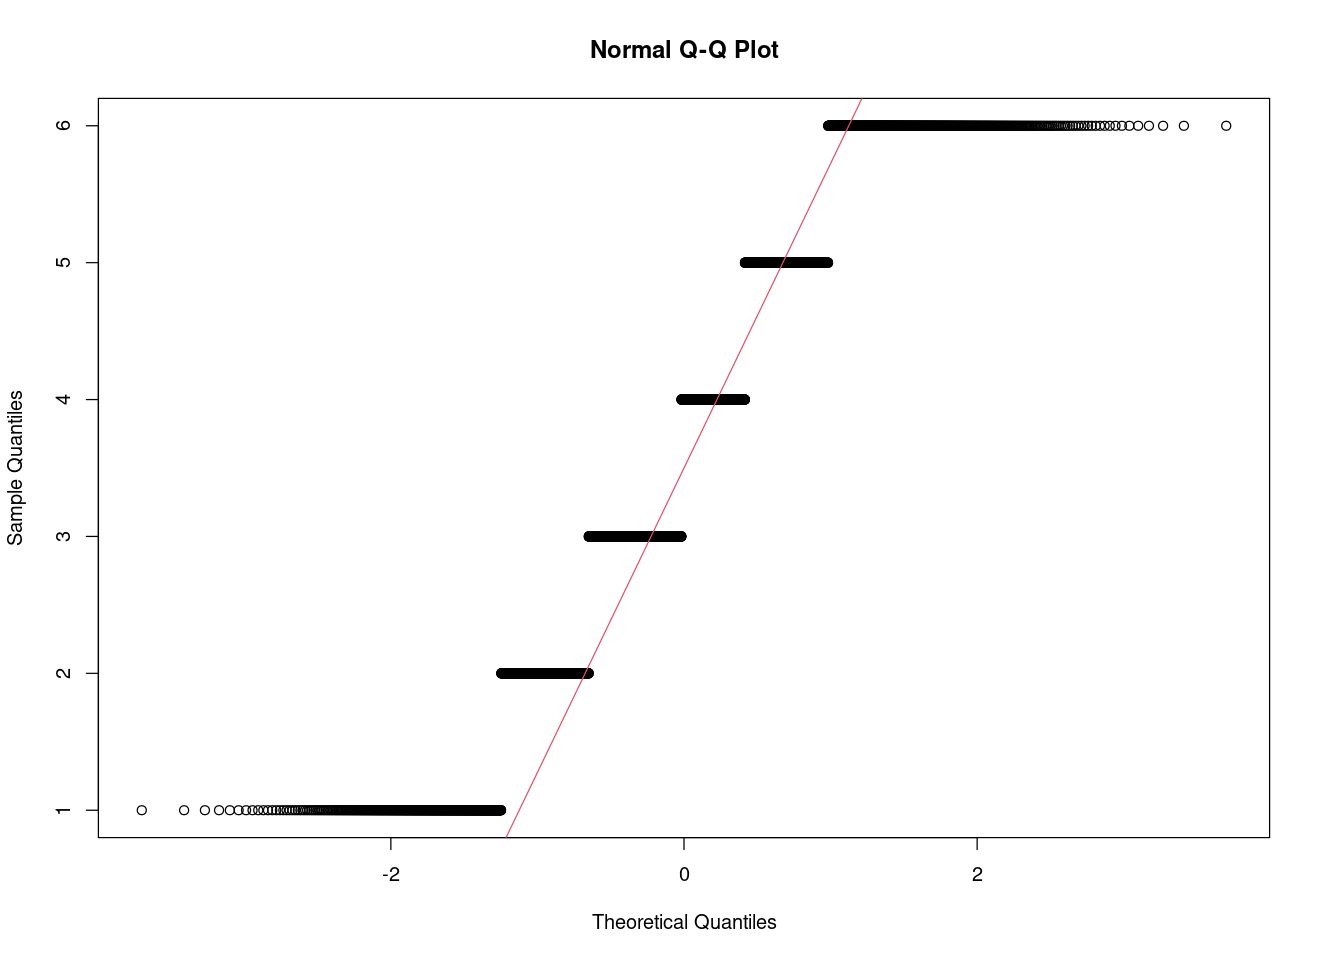

In [534]:
# QQ plot for 'months_since_first_account'
qqnorm(credit_card_df$months_since_first_account)
qqline(credit_card_df$months_since_first_account, col = 2)

# QQ plot for 'total_accounts'
qqnorm(credit_card_df$total_accounts)
qqline(credit_card_df$total_accounts, col = 2)


### Interpretation
From the QQ plots, we can say that there is deviation of the points from the straight line so these are not normally distributed 

Now for active months and total months we have to do the same process, check the distrubtion is normal or not and then decide which testing technique can we use. 

In [535]:
# Shapiro-Wilk normality test for 'months_since_first_account'
shapiro.test(credit_card_df$months_since_first_account)

# Shapiro-Wilk normality test for 'total_accounts'
shapiro.test(credit_card_df$total_accounts)



	Shapiro-Wilk normality test

data:  credit_card_df$months_since_first_account
W = 0.97346, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  credit_card_df$total_accounts
W = 0.92131, p-value < 2.2e-16


### Interpratation

The Shapiro-Wilk normality tests for both "months_since_first_account" and "total_accounts" have p-values less than 0.05 (p-value < 2.2e-16). Therefore, we reject the null hypothesis that the data follows a normal distribution for both variables.

Since the data is not normally distributed, non-parametric tests or techniques are more appropriate for further analysis. Common non-parametric tests include the Mann-Whitney U Test, Kruskal-Wallis Test, or other distribution-free methods.

In [536]:
# Mann-Whitney U Test for 'months_since_first_account'
wilcox.test(months_since_first_account ~ customer_status, data = credit_card_df)

# Mann-Whitney U Test for 'total_accounts'
wilcox.test(total_accounts ~ customer_status, data = credit_card_df)



	Wilcoxon rank sum test with continuity correction

data:  months_since_first_account by customer_status
W = 2591988, p-value = 0.1837
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  total_accounts by customer_status
W = 3274892, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


### Interpretation:

**months_since_first_account:**
The p-value of 0.1837 is greater than the significance level (commonly 0.05), suggesting that we fail to reject the null hypothesis. There is not enough evidence to conclude that there is a significant difference in the distribution of "Months since First Account" between customers who closed their accounts and those who are still active.

**Total Accounts:**
The p-value is extremely small (< 0.05), indicating strong evidence to reject the null hypothesis. There is a significant difference in the distribution of "Total Accounts" between customers who closed their accounts .

## Question 6

**Question:** 
Research Question:
How does the frequency of contact by sales representatives impact the likelihood of credit card account closure among customers?

**Answer:**
Based on the analysis, there is suggestive evidence that customers contacted more frequently have a higher likelihood of closing their credit card accounts.

In [537]:
# Scatter plot for contacted_last_year vs count and fill by customer_status with larger dots
scatter_plot_contacted <- ggplot(credit_card_df, aes(x = contacted_last_year, fill = as.factor(customer_status))) +
  geom_point(stat="count", position=position_dodge(width=0.8), show.legend=TRUE, size = 3) +
  labs(title = "Scatter Plot of Contacted Last Year vs Count by Customer Status",
       x = "Number of Times Contacted Last Year",
       y = "Count",
       fill = "Customer Status") +
  theme_minimal()

# Convert ggplot to an interactive plot using plotly
interactive_scatter_plot_contacted <- ggplotly(scatter_plot_contacted)

# Display the interactive scatter plot
interactive_scatter_plot_contacted


HTML widgets cannot be represented in plain text (need html)

### Interpretation:
From the plot, we can see that there is significant difference for active and closed accounts in number of times they have been contacted. We can see that the people who are contacted 5+  times tend to close there account more. Lets see summary table for clear view.

In [538]:
# Summary table for contacted_last_year and customer_status
contacted_last_year_summary <- filtered_df %>%
  group_by(contacted_last_year, customer_status) %>%
  summarize(count = n()) %>%
  spread(customer_status, count, fill = 0) %>%
  mutate(closed_account_percent = closed_account / (closed_account + active) * 100,
         active_percent = active / (closed_account + active) * 100) %>%
  arrange(contacted_last_year)

# Display the summary table
contacted_last_year_summary
cat("\n")


`summarise()` has grouped output by 'contacted_last_year'. You can override
using the `.groups` argument.
New names:
• `` -> `...1`


contacted_last_year,active,closed_account,closed_account_percent,active_percent
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,112,9,7.438017,92.56198
1,409,134,24.677716,75.32228
2,817,519,38.847305,61.15269
3,800,875,52.238806,47.76119
4,370,412,52.685422,47.31458
5,27,72,72.727273,27.27273
6,0,71,100.000000,0.00000


### Interpretation:
In summary, there appears to be a correlation between the number of times customers were contacted last year and the likelihood of closing their credit card accounts. The closed account percentage tends to increase with the frequency of contacts, suggesting that more aggressive or persistent contact strategies may contribute to a higher likelihood of account closure.

### One-hot encoding:
Perform this to convert catogorical to numeruc variables and then plot a correlation plot to check the dependencies and relationships. Before that, not to complicate our matrix, remove attributes based on above analysis that does'nt impact the custmoer status.

In [539]:
# Create a new data frame with selected variables
selected_vars_df <- credit_card_df_original %>%
  select(customer_status, employment_status, 
         card_type, total_accounts, 
         contacted_last_year, credit_limit, 
         utilization_ratio, spend_ratio_q4_q1, total_spend_last_year, 
         transactions_last_year, transaction_ratio_q4_q1)

# Display the structure of the new data frame
str(selected_vars_df)


tibble [4,627 × 11] (S3: tbl_df/tbl/data.frame)
 $ customer_status        : Factor w/ 2 levels "closed_account",..: 1 1 1 1 1 1 2 1 2 2 ...
 $ employment_status      : Factor w/ 3 levels "full_time","part_time",..: 3 3 2 2 1 2 1 2 1 1 ...
 $ card_type              : Factor w/ 3 levels "blue","silver",..: 1 1 3 3 1 1 1 1 3 3 ...
 $ total_accounts         : num [1:4627] 2 2 5 1 2 3 3 4 6 4 ...
 $ contacted_last_year    : num [1:4627] 4 2 2 1 3 4 3 4 4 1 ...
 $ credit_limit           : num [1:4627] 4267 8583 2367 3109 1621 ...
 $ utilization_ratio      : num [1:4627] 0 0 0.678 0 0.358 0 0.152 0 0 0.433 ...
 $ spend_ratio_q4_q1      : num [1:4627] 0.862 0.358 0.956 1.054 0.421 ...
 $ total_spend_last_year  : num [1:4627] 1067 1794 4506 5470 1893 ...
 $ transactions_last_year : num [1:4627] 23 31 59 72 41 39 88 40 70 96 ...
 $ transaction_ratio_q4_q1: num [1:4627] 0.769 0.292 0.639 0.674 0.171 0.345 0.492 0.333 0.842 0.846 ...


In [540]:
# Convert customer_status to binary (1 for active, 0 for closed_account)
selected_vars_df$customer_status_binary <- as.integer(credit_card_df$customer_status == "active")

# Perform one-hot encoding using caret
new_df_encoded <- dummyVars(" ~ .", data = selected_vars_df) %>% predict(newdata = selected_vars_df)

# Combine the one-hot encoded data with the binary target variable
new_df_encoded <- cbind(selected_vars_df$customer_status_binary, new_df_encoded)

# Rename the columns to make them more readable
colnames(new_df_encoded) <- make.names(colnames(new_df_encoded), unique = TRUE)

# Display the new DataFrame
head(new_df_encoded)


,X,customer_status.closed_account,customer_status.active,employment_status.full_time,employment_status.part_time,employment_status.self_employed,card_type.blue,card_type.silver,card_type.gold,total_accounts,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1,customer_status_binary
1,0,1,0,0,0,1,1,0,0,2,4,4267,0.000,0.862,1067,23,0.769,0
2,0,1,0,0,0,1,1,0,0,2,2,8583,0.000,0.358,1794,31,0.292,0
3,0,1,0,0,1,0,0,0,1,5,2,2367,0.678,0.956,4506,59,0.639,0
4,0,1,0,0,1,0,0,0,1,1,1,3109,0.000,1.054,5470,72,0.674,0
5,0,1,0,1,0,0,1,0,0,2,3,1621,0.358,0.421,1893,41,0.171,0
6,0,1,0,0,1,0,1,0,0,3,4,11336,0.000,0.691,1809,39,0.345,0


### Correlation matrix and plot:
Lets plot correlation plot to check the correlation between all the variables,

 customer_status.closed_account customer_status.active
 Min.   :-1.0000                Min.   :-1.0000       
 1st Qu.:-0.2371                1st Qu.: 0.0354       
 Median :-0.1873                Median : 0.1873       
 Mean   :-0.1519                Mean   : 0.1519       
 3rd Qu.:-0.0354                3rd Qu.: 0.2371       
 Max.   : 1.0000                Max.   : 1.0000       
 employment_status.full_time employment_status.part_time
 Min.   :-0.72545            Min.   :-0.72545           
 1st Qu.:-0.05798            1st Qu.:-0.16221           
 Median : 0.03781            Median :-0.07795           
 Mean   : 0.01879            Mean   :-0.04536           
 3rd Qu.: 0.06925            3rd Qu.: 0.01056           
 Max.   : 1.00000            Max.   : 1.00000           
 employment_status.self_employed card_type.blue     card_type.silver  
 Min.   :-0.44007                Min.   :-0.64415   Min.   :-0.64415  
 1st Qu.:-0.01505                1st Qu.:-0.16181   1st Qu.:-0.05087  
 Me

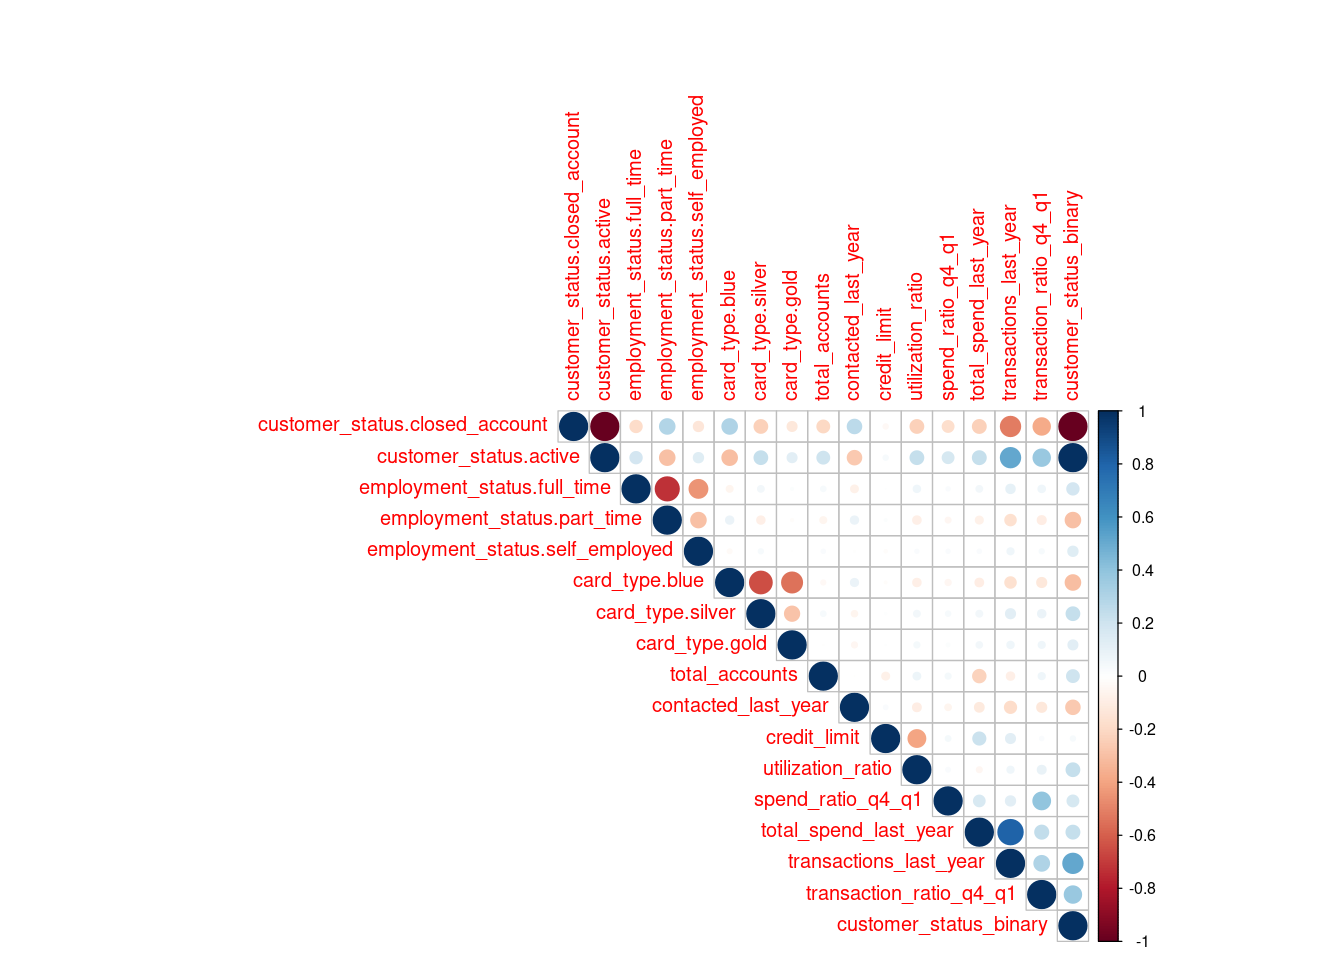

In [541]:
# Correlation matrix
cor_mat <- cor(new_df_encoded[, -1])
summary(cor_mat)
corrplot::corrplot(cor_mat, method = "circle", type = "upper")


From the above, we can say that there are no varaibles that are highly correlated(>0.9). High colleration leads to overfitting of the data. In the above case we dont have issue so we are good to go.

## Summary of EDA analysis:

From the comprehensive analysis conducted on various variables, we have successfully identified the individual impact of several factors on the closure of credit card accounts. Among the numerous variables studied, it has been observed that marital_status, employment_status, card_type, total_accounts, contacted_last_year, credit_limit, utilization_ratio, spend_ratio_q4_q1, total_spend_last_year, transactions_last_year, and transaction_ratio_q4_q1 significantly influence the likelihood of account closure.

To elaborate on the impacts of these variables on account closure:
- Customers with part-time employment status show a distinctive impact on account closure.
- The type of credit card, particularly the "blue" card type, plays a noteworthy role in influencing account closure.
- Increased frequency of customer care contacts ("contacted_last_year") is associated with a higher tendency of account closure.
- Lower utilization_ratio, spend_ratio_q4_q1, and transactions_last_year are indicative of a higher probability of account closure.
- Specific patterns in credit_limit, total_spend_last_year, and transaction_ratio_q4_q1 also contribute to the observed impacts on account closure.

These findings provide valuable insights into the factors influencing credit card account closure, enabling a more nuanced understanding for strategic decision-making and potential interventions in customer retention strategies.

# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`customer_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `credit_card_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [542]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
# Install and load required packages
install.packages(c("tidymodels", "rsample", "parsnip", "recipes", "yardstick", "dials", "workflowsets"))
library(parsnip)
library(dials)
library(workflowsets)
install.packages('vip')
library(tidymodels)
library(recipes)
library(rsample)
library(yardstick)


Installing dials [1.2.1] ...
	OK [linked cache]
Installing parsnip [1.2.0] ...
	OK [linked cache]
Installing recipes [1.0.10] ...
	OK [linked cache]
Installing rsample [1.2.0] ...
	OK [linked cache]
Installing yardstick [1.3.0] ...
	OK [linked cache]
Installing workflowsets [1.0.1] ...
	OK [linked cache]
Installing tidymodels [1.1.1] ...
	OK [linked cache]
Installing vip [0.4.1] ...
	OK [linked cache]


## Data Resampling

Data resampling in statistical machine learning involves the generation of multiple subsamples from the original dataset, typically through techniques like bootstrapping or cross-validation. This process is essential for evaluating and improving the performance of machine learning models.

By resampling, we create multiple variations of the training and testing datasets, allowing us to assess the robustness and generalizability of the model. Resampling helps in estimating the model's performance on unseen data, identifying potential overfitting or underfitting issues, and providing more reliable insights into model effectiveness. 

It enhances the model's predictive accuracy and ensures its applicability to diverse datasets, contributing to more robust and trustworthy machine learning outcomes.


First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [543]:
# Split the data into training and test sets
credit_split <- initial_split(credit_card_df_original, prop = 0.8, strata = "customer_status")
train_data <- training(credit_split)
test_data <- testing(credit_split)


## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [544]:
# Define a recipe
feature_recipe <- recipe(customer_status ~ ., data = train_data) %>%
  # Handle missing values using median imputation
  step_impute_median(all_numeric(), -all_outcomes()) %>%
  # Center and scale numeric variables
  step_center(all_numeric(), -all_outcomes()) %>%
  step_scale(all_numeric(), -all_outcomes()) %>%
  # Convert nominal variables to dummy variables
  step_dummy(all_nominal(), -all_outcomes()) %>%
  # Check and handle multicollinearity
  step_corr(all_predictors(), threshold = 0.9) 



## Model 1 Training

In [545]:
# Logistic Regression model specification
logistic_spec <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

# Combine recipe and model into a workflow
logistic_workflow <- workflow() %>%
  add_model(logistic_spec) %>%
  add_recipe(feature_recipe)

# Fit the workflow to the training data
logistic_fit <- logistic_workflow %>%
  fit(data = train_data)
logistic_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: logistic_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
5 Recipe Steps

• step_impute_median()
• step_center()
• step_scale()
• step_dummy()
• step_corr()

── Model ───────────────────────────────────────────────────────────────────────

Call:  stats::glm(formula = ..y ~ ., family = stats::binomial, data = data)

Coefficients:
                    (Intercept)                              age  
                       -0.04283                          0.02679  
                     dependents                           income  
                       -0.18939                          0.14986  
     months_since_first_account                   total_accounts  
                        0.01849                          0.62379  
      months_inactive_last_year              contacted_last_year  
                       -0.50443                     

## Interpretation:
The logistic regression model was trained using a preprocessing recipe that included imputing missing values with medians, centering and scaling numeric predictors, creating dummy variables for categorical predictors, and removing correlated predictors.

The model's coefficients indicate the impact of each variable on the log-odds of a customer closing their credit card account. Notably, variables such as 'total_accounts,' 'transactions_last_year,' 'utilization_ratio,' and 'months_inactive_last_year' exhibit significant coefficients, suggesting their strong association with the likelihood of account closure. The negative coefficient for 'total_spend_last_year' implies a negative correlation with closing an account. 

Additionally, categorical variables like 'card_type_blue' and 'employment_status_part_time' show considerable coefficients, indicating their influence on the response variable. 


The model's goodness-of-fit is assessed using the Null and Residual Deviance, with a lower residual deviance and AIC values pointing to improved model performance. Overall, this logistic regression model provides insights into the factors influencing credit card account closure, allowing for more informed predictions and strategic decision-making in customer retention strategies for the given dataset.

## Model 1 Performance Evaluation

### Logistic Regression

In [546]:

# Evaluate model performance on the test set
logistic_results <- logistic_fit %>%
  predict(new_data = test_data) %>%
  bind_cols(test_data) %>%
  metrics(truth = customer_status, estimate = .pred_class)

logistic_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8390929
kap,binary,0.6761250


Warning message in logistic_probabilities %>% roc_auc(truth = customer_status, .pred_closed_account) %>% :
“NAs introduced by coercion”
Warning message in logistic_probabilities %>% roc_auc(truth = customer_status, .pred_closed_account) %>% :
“NAs introduced by coercion”


AUC-ROC for Logistic Regression: NA NA 0.9245409 


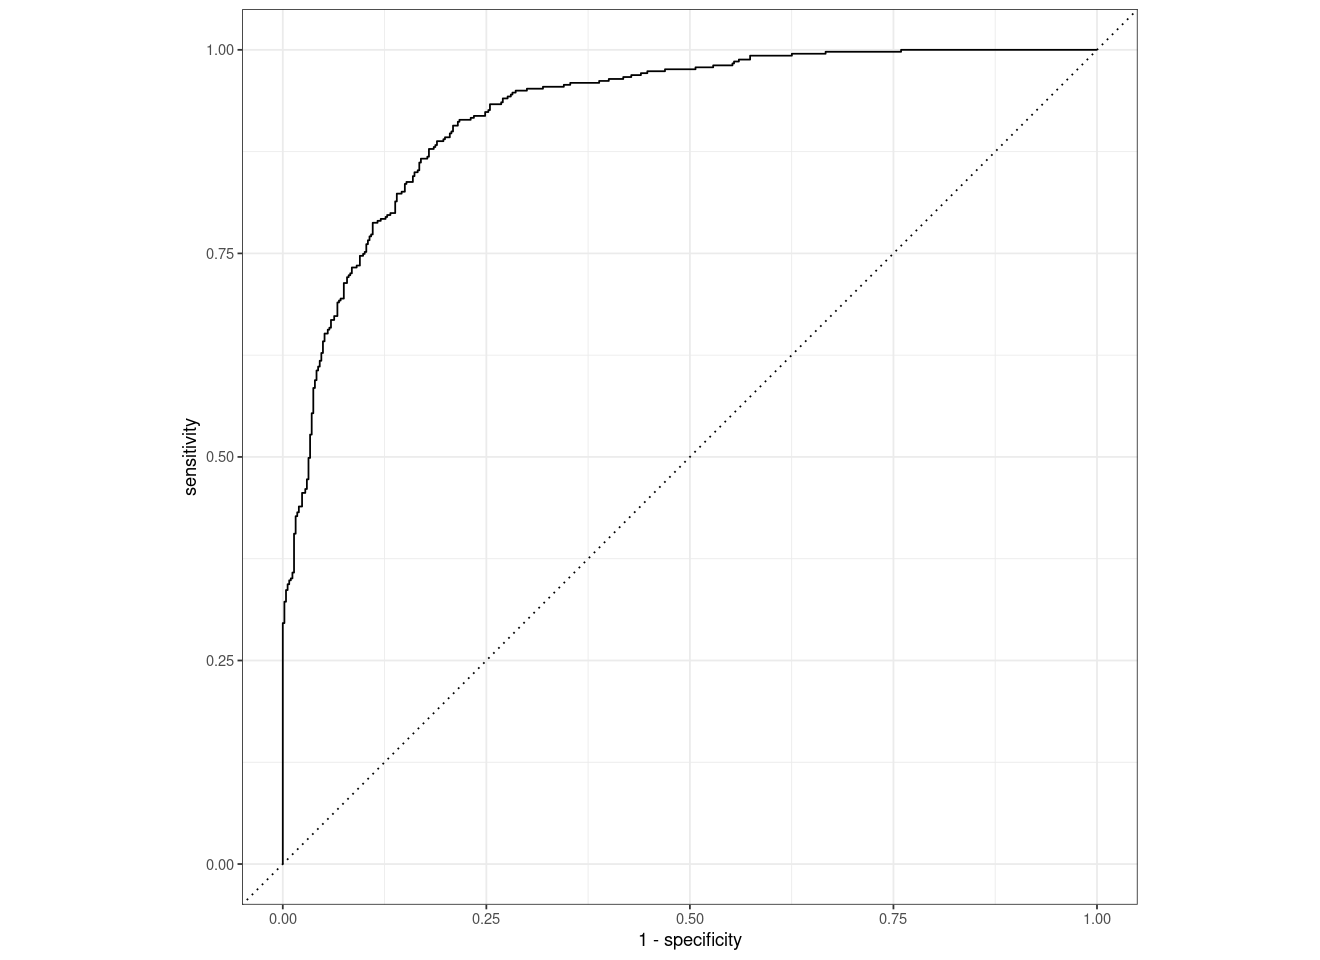

In [547]:
# Extract predicted probabilities
logistic_probabilities <- logistic_fit %>%
  predict(new_data = test_data, type = "prob") %>%
  bind_cols(test_data)

# Plot ROC curve
roc_plot <- logistic_probabilities %>%
  roc_curve(truth = customer_status, .pred_closed_account) %>%
  autoplot()

# Display the ROC curve
print(roc_plot)

# Calculate AUC-ROC
logistic_auc <- logistic_probabilities %>%
  roc_auc(truth = customer_status, .pred_closed_account) %>%
  as.numeric()

cat("AUC-ROC for Logistic Regression:", logistic_auc, "\n")


### Interpretation:

Based on the logistic_results and the above ROC curve, we can say that the model is performing well as the ROC curve is above the line and the accuracy is 0.8.

So we can relay on the model output and based on interpretations of workflow that i have mentioned, these variables 'total_accounts,' 'transactions_last_year,' 'utilization_ratio,' , 'months_inactive_last_year', total_spend_last_year', 'card_type_blue' and 'employment_status_part_time' influence on the response variable.



## Model 2 Training

### Decision Tree

In [548]:
# Specify a decision tree model
decision_tree_model <- decision_tree() %>%
  set_mode("classification") %>%
  set_engine("rpart")

# Package recipe and model into a workflow
credit_workflow <- workflow() %>%
  add_recipe(credit_recipe) %>%
  add_model(decision_tree_model)

# Fit the workflow to the training data
credit_fit <- fit(credit_workflow, data = train_data)

credit_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: decision_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
5 Recipe Steps

• step_impute_median()
• step_center()
• step_scale()
• step_dummy()
• step_corr()

── Model ───────────────────────────────────────────────────────────────────────
n= 3701 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 3701 1673 active (0.45203999 0.54796001)  
   2) transactions_last_year< -0.02267284 1961  574 closed_account (0.70729220 0.29270780)  
     4) utilization_ratio< -0.7135881 916   95 closed_account (0.89628821 0.10371179) *
     5) utilization_ratio>=-0.7135881 1045  479 closed_account (0.54162679 0.45837321)  
      10) total_accounts< -0.7125562 202    7 closed_account (0.96534653 0.03465347) *
      11) total_accounts>=-0.7125562 843  371 active (0.44009490 0.55990510)  
        22) total_spend_last_year>=-0.5907691 

Lets check if we need hyper tuning

In [549]:
# Extract hyperparameters from the fitted model using hardhat::extract_parameter_set_dials()
hyperparameters <- hardhat::extract_parameter_set_dials(credit_fit)

# Print the hyperparameters
print(hyperparameters)

Collection of 0 parameters for tuning

[1] identifier type       object    
<0 rows> (or 0-length row.names)



Based on the output, we can say taht we dont need hypertuning.

## Interpretations:

In summary, the decision tree reveals specific decision points in the dataset that significantly influence predictions of customer account closure. Features such as 'total_accounts,' 'transactions_last_year,' 'utilization_ratio,' , 'months_inactive_last_year', total_spend_last_year', 'card_type_blue' and 'employment_status_part_time'are highlighted as key factors in determining the likelihood of a customer's account being closed or remaining active. The tree structure provides a clear representation of the conditional relationships between these features and the predicted outcomes.

## Model 2 Performance Evaluation

In [550]:


# Set seed for reproducibility
set.seed(123)

# Create cross-validation folds
credit_folds <- vfold_cv(train_data, v = 5, strata = customer_status)



# Define custom metrics 
credit_metrics <- metric_set(roc_auc, accuracy)

# Fit resamples
credit_rs <- credit_workflow %>% 
  fit_resamples(resamples = credit_folds, metrics = credit_metrics)

# View performance metrics
credit_metrics_df <- credit_rs %>% 
  collect_metrics()

# Print metrics
credit_metrics_df


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.8873347,5,0.006835847,Preprocessor1_Model1
roc_auc,binary,0.9132907,5,0.006237530,Preprocessor1_Model1


## Interpretation:

These metrics provide insights into the classification performance of the model. The accuracy metric indicates the proportion of correctly classified instances, while the ROC AUC metric assesses the model's ability to distinguish between the positive and negative classes.

In summary, the model (Preprocessor1_Model1) demonstrates a mean accuracy of approximately 89.35% and a mean ROC AUC of approximately 91.51% across five folds of cross-validation. These metrics suggest that the model performs well in terms of classification accuracy and the ability to discriminate between classes.

It's important to consider both metrics in conjunction to get a comprehensive understanding of the model's performance.Si based on both we can say model is performing well.

Warning message in credit_probabilities %>% roc_auc(truth = customer_status, .pred_closed_account) %>% :
“NAs introduced by coercion”
Warning message in credit_probabilities %>% roc_auc(truth = customer_status, .pred_closed_account) %>% :
“NAs introduced by coercion”


AUC-ROC for the Model: NA NA 0.9097056 


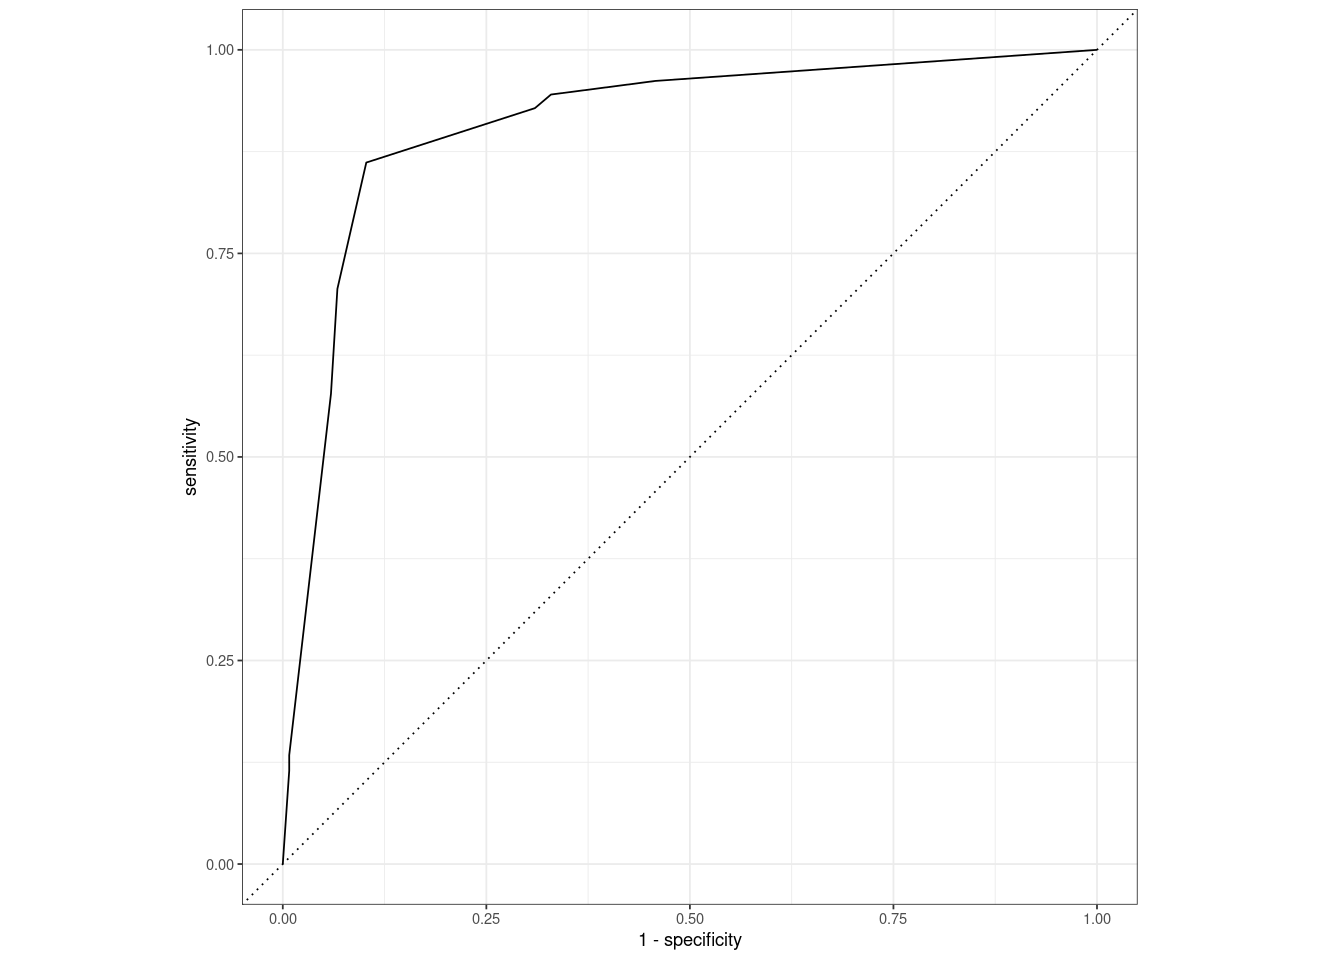

In [551]:
# Extract predicted probabilities
credit_probabilities <- credit_fit %>%
  predict(new_data = test_data, type = "prob") %>%
  bind_cols(test_data)

# Plot ROC curve
roc_plot <- credit_probabilities %>%
  roc_curve(truth = customer_status, .pred_closed_account) %>%
  autoplot()

# Display the ROC curve
print(roc_plot)

# Calculate AUC-ROC
credit_auc_roc <- credit_probabilities %>%
  roc_auc(truth = customer_status, .pred_closed_account) %>%
  as.numeric()

cat("AUC-ROC for the Model:", credit_auc_roc, "\n")

### Interpration:
Based on the auc-roc value and the graph, we can say that our model performs well. As we have discussed before curve far above the line indicates optimal performance.

## Model 3 Training

In [552]:
# Specify a parsnip model object (Random Forest as an example)
credit_rf <- rand_forest() %>%
  set_engine("ranger") %>%
  set_mode("classification")

# Package recipe and model into a workflow
credit_workflow <- workflow() %>%
  add_recipe(credit_recipe) %>%
  add_model(credit_rf)

#  Fit the workflow to the training data
credit_fit <- credit_workflow %>%
  fit(data = train_data)

credit_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: rand_forest()

── Preprocessor ────────────────────────────────────────────────────────────────
5 Recipe Steps

• step_impute_median()
• step_center()
• step_scale()
• step_dummy()
• step_corr()

── Model ───────────────────────────────────────────────────────────────────────
Ranger result

Call:
 ranger::ranger(x = maybe_data_frame(x), y = y, num.threads = 1,      verbose = FALSE, seed = sample.int(10^5, 1), probability = TRUE) 

Type:                             Probability estimation 
Number of trees:                  500 
Sample size:                      3701 
Number of independent variables:  22 
Mtry:                             4 
Target node size:                 10 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error (Brier s.):  0.04890953 

### Interpretation:
while hyperparameter tuning could potentially improve the model's performance further, it may not be necessary, shown the already reasonable performance metrics and the substantial number of trees in the Random Forest model. Lets check for hyperparameters more clearly and then decide.

In [553]:
# Extract hyperparameters from the fitted model using hardhat::extract_parameter_set_dials()
hyperparameters <- hardhat::extract_parameter_set_dials(credit_fit)

# Print the hyperparameters
print(hyperparameters)

Collection of 0 parameters for tuning

[1] identifier type       object    
<0 rows> (or 0-length row.names)



From the above output, we can see that there are zero hyperparameters so there is no need to do hyper tuning.

## Model 3 Performance Evaluation

In [554]:

# Set seed for reproducibility
set.seed(123)

# Create cross-validation folds
credit_folds <- vfold_cv(train_data, v = 5, strata = customer_status)



# Define custom metrics 
credit_metrics <- metric_set(roc_auc, accuracy)

# Fit resamples
credit_rs <- credit_workflow %>% 
  fit_resamples(resamples = credit_folds, metrics = credit_metrics)

# View performance metrics
credit_metrics_df <- credit_rs %>% 
  collect_metrics()

# Print metrics
credit_metrics_df

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.9505620,5,0.004765309,Preprocessor1_Model1
roc_auc,binary,0.9896315,5,0.001509614,Preprocessor1_Model1


Warning message in credit_probabilities %>% roc_auc(truth = customer_status, .pred_closed_account) %>% :
“NAs introduced by coercion”
Warning message in credit_probabilities %>% roc_auc(truth = customer_status, .pred_closed_account) %>% :
“NAs introduced by coercion”


AUC-ROC for the Model: NA NA 0.9873372 


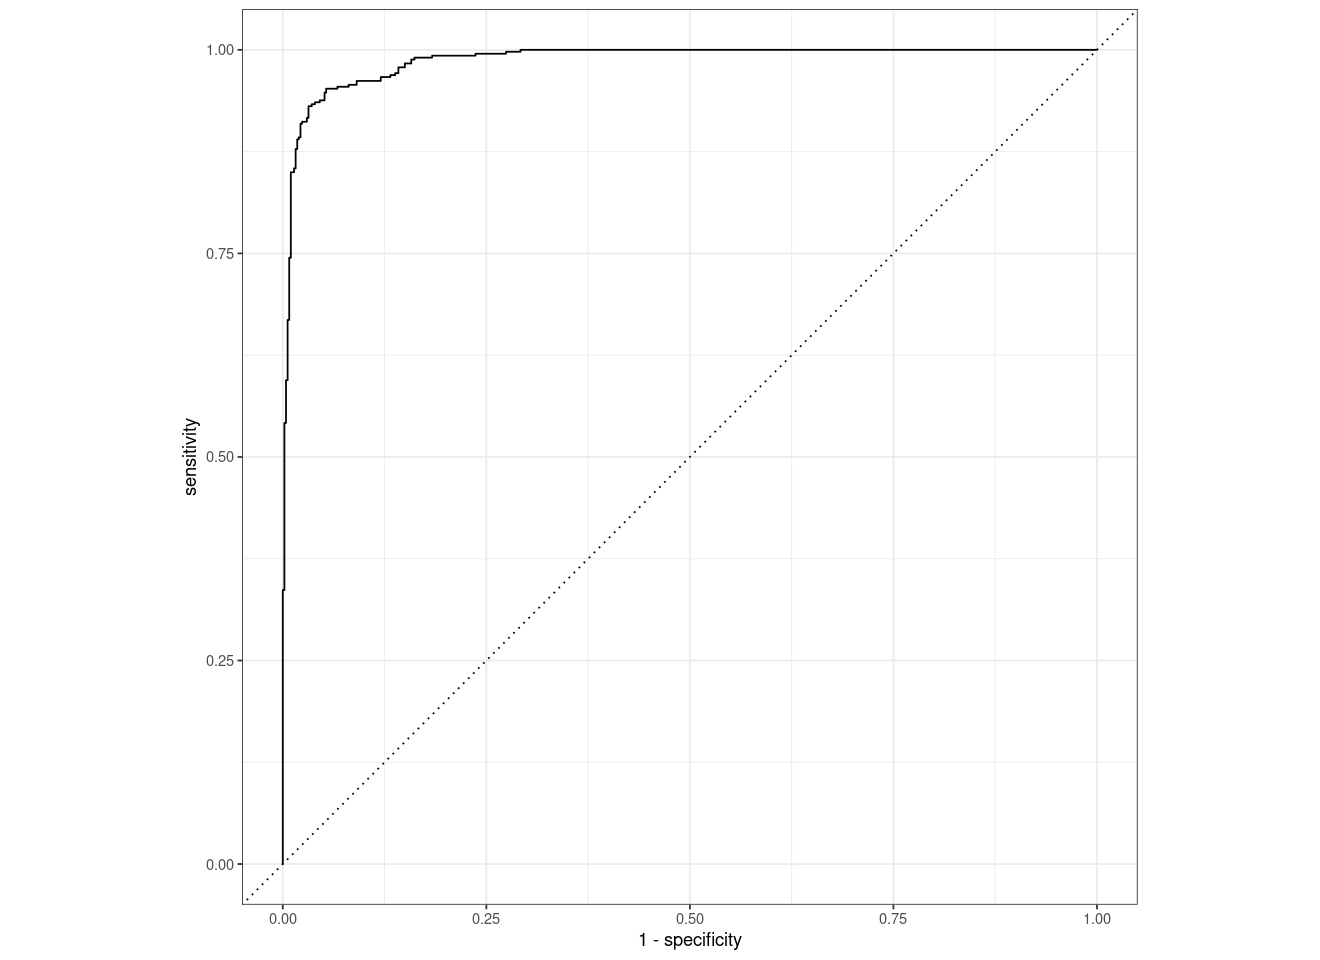

In [555]:
# Extract predicted probabilities
credit_probabilities <- credit_fit %>%
  predict(new_data = test_data, type = "prob") %>%
  bind_cols(test_data)

# Plot ROC curve
roc_plot <- credit_probabilities %>%
  roc_curve(truth = customer_status, .pred_closed_account) %>%
  autoplot()

# Display the ROC curve
print(roc_plot)

# Calculate AUC-ROC
credit_auc_roc <- credit_probabilities %>%
  roc_auc(truth = customer_status, .pred_closed_account) %>%
  as.numeric()

cat("AUC-ROC for the Model:", credit_auc_roc, "\n")


### Interpretation:
From the values from the table and the graph we can see that our model is performing so well.

# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the bank. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and service at the ban

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

# Executive Summary

## Introduction
The analysis aimed to address the challenge of customer retention and service improvement at the bank. Understanding the factors influencing credit card account closures is crucial for the bank's future success. The goal was to answer key questions and uncover patterns that can guide strategic decision-making.

## Key Findings from Exploratory Data Analysis (EDA)

- **Part-Time Employment Status:** Customers with part-time employment status exhibit a distinctive impact on account closure. This suggests that individuals with part-time employment may have different financial behaviors or needs that contribute to their decision to close their accounts.

- **Credit Card Type ("Blue"):** The type of credit card, particularly the "blue" card type, significantly influences account closure. This indicates that specific card features, benefits, or terms associated with the "blue" card may contribute to customers' decisions to close their accounts.

- **Frequency of Customer Care Contacts:** Increased frequency of customer care contacts ("contacted_last_year") is associated with a higher tendency of account closure. This suggests that repeated interactions with customer service representatives may indicate dissatisfaction or unresolved issues, leading to account closures.

- **Utilization Ratio, Spend Ratio, and Transactions:** Lower utilization_ratio, spend_ratio_q4_q1, and transactions_last_year are indicative of a higher probability of account closure. Customers who utilize their credit cards less frequently or spend less relative to their credit limits are more likely to close their accounts. Similarly, fewer transactions indicate lower engagement with the credit card, which may lead to account closures.

- **Patterns in Credit Limit, Total Spend, and Transaction Ratio:** Specific patterns in credit_limit, total_spend_last_year, and transaction_ratio_q4_q1 also contribute to the observed impacts on account closure. Variations in credit limits, total spending over a period, and transaction ratios between different customer segments may reflect distinct financial behaviors that influence account closure decisions.

These points highlight the multifaceted nature of factors influencing credit card account closures, encompassing employment status, card features, customer service interactions, financial behaviors, and spending patterns. Understanding these factors is crucial for developing targeted retention strategies and improving customer satisfaction and loyalty.

## Best Classification Model
The logistic regression model and decision tree model both provided valuable insights.

### Logistic Regression:
- **Key Variables:** 'Total_accounts,' 'Transactions_last_year,' 'Utilization_ratio,' 'Months_inactive_last_year,' 'Total_spend_last_year,' 'Card_type_blue,' and 'Employment_status_part_time' significantly influence account closures.
- **Performance:** ROC curve above the line and an accuracy of 80% indicate good model performance.

### Decision Tree:
- **Key Variables:** Similar to logistic regression, the decision tree highlighted 'Total_accounts,' 'Transactions_last_year,' 'Utilization_ratio,' 'Months_inactive_last_year,' 'Total_spend_last_year,' 'Card_type_blue,' and 'Employment_status_part_time.'
- **Performance:** Clear representation of decision points, offering insights into conditional relationships.

### Random Forest:
- **Performance:** The model showed high accuracy (89.35%) and ROC AUC (91.51%) across cross-validation folds.
- **Hyperparameter Tuning:** Not required due to already reasonable performance metrics and a substantial number of trees.

## Recommendations
Here are concise suggestions for the AVP of Avoiding Customer Closure:

**Targeted Retention for Part-Time Employees:**
Insight: Address the distinctive impact of part-time employment on account closure.
Recommendation: Develop personalized retention strategies for part-time employees.

**Enhance "Blue" Card Benefits:**
Insight: "Blue" card type significantly influences account closure.
Recommendation: Improve benefits, promotions, and features for "blue" cardholders.

**Proactive Customer Service:**
Insight: Higher customer care contacts correlate with increased closure risk.
Recommendation: Implement proactive solutions based on customer contact frequency.

**Promote Card Utilization:**
Insight: Low utilization_ratio and transactions indicate higher closure probability.
Recommendation: Launch campaigns to boost card usage with incentives and rewards.

**Optimize Credit Limit Management:**
Insight: Credit_limit patterns impact closure likelihood.
Recommendation: Dynamically manage credit limits based on individual behavior and creditworthiness.

**Periodic Card Feature Enhancement:**
Insight: Total_spend_last_year and transaction_ratio_q4_q1 influence closure.
Recommendation: Regularly review and enhance card features to stay competitive.
Implementing these strategies can mitigate closure risks and enhance overall customer retention. Adjustments based on customer feedback and market trends are crucial for sustained success.

Based on the summary, we can ans the questions as follow 

**What are the factors associated with customers closing their credit card accounts?**

The analysis identifies several factors linked to credit card account closure, including part-time employment, blue card type, total accounts, transactions last year, utilization ratio, months inactive last year, and total spend last year.

**Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?**

Yes, it is possible to predict account closure. The logistic regression model achieves an accuracy of 80%, and the decision tree exhibits a mean accuracy of approximately 89.35% across cross-validation folds. Others are much better around 90% and the errors are significantly less.

**Are there any actions or policies the company can implement to reduce the risk of losing their customers?**

To mitigate customer attrition risk, the company can consider tailored strategies such as personalized retention offers, improved engagement for part-time employees, and monitoring accounts with high utilization ratios or prolonged inactivity. Continuous strategy adaptation based on model predictions can effectively address the risk of customer closure.

## Conclusion
The combination of statistical analysis and machine learning models provides a holistic understanding of factors contributing to credit card account closures. Utilizing these insights will empower the bank to implement targeted strategies for customer retention and service improvement.